# Part 1: Introduction and brief overview

This workshop is conducted by ***Milena Vujović$^{1}$***,  ***Frederikke Isa Marin$^{1}$*** and ***Anna-lisa Schaap-Johansen$^{1}$***. 

Data wrangling, visualisation and basic statistics have become one of the staples in every day researchers life. It doesn't matter whether your field of interest is chemistry, biology, immunology or bioinformatics, it is of utmost importance that you are able to present the results of your analysis in a clear and concise way. Furthermore, it is paramount that you are able to choose the best analysis to answer your scientific question. 

With this in mind, today we will go over
1. manipulating data with pandas

2. visualisation techniques available in python 

At the end of this day you should be able to:
1. import and manipulate your data effortlesly within the pandas software library 
2. confidently choose the best way to visualise your data 
3. make your desired graph with little effort 


We will go over two datasets in order to fullfil our goals. 

The first dataset stored in "aa_frequency_location.tsv" has information on the N-terminus of proteins. The dataset cosists of two classes Secretory and Non-secretory proteins. The input consists of 20 features, which are the amino acid frequencies of the first 30 amino acids of a protein (N-terminal part). Our main question is whether or not we can see any differnces in amino acid usage between secretory and non secretory proteins and how can we use this to classify the proteins. 

The second dataset is stored in "tissue_expression.tsv". It contains gene expression levels for 189 samples and 7 tissues. 

(source: http://genomicsclass.github.io/book/pages/pca_svd.html)


Suggested reading, useful links and inspiration: 
- Python graph gallery: https://python-graph-gallery.com/
- Pandas cheat sheet: http://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3
- Pandas cheat sheet for data science in Python: https://www.datacamp.com/community/blog/python-pandas-cheat-sheet?utm_source=adwords_ppc&utm_campaignid=1655852085&utm_adgroupid=77088685371&utm_device=c&utm_keyword=%2Bpandas%20%2Bcheat%20%2Bsheet&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=353755544529&utm_targetid=kwd-589281899014&utm_loc_interest_ms=&utm_loc_physical_ms=1005023&gclid=Cj0KCQjwnv71BRCOARIsAIkxW9EbjTYewJGXuT-YGeJu1TCijpeHLcYetiFa73kju8JJbRh9IVYhk7gaAvNjEALw_wcB

- Seaborn cheat sheet: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf

***
You can contact us at<br>
Milena Vujovic: milvu@dtu.dk (twitter: *@sciencisto* ) <br>
Frederikke Isa Marin: frisa@dtu.dk (twitter: *@fimarin42) <br> 
Anna-Lisa Schaap-Johansen: alsj@dtu.dk (twitter: *@SchaapJohansen) <br>
and also for the duration of this course on wechat :)

$^{1}$ Bioinformatics section, DTU Health Technology, Technical University of Denmark, Greater Copenhagen area, Denmark<br>


In [2]:
# Load packages
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import parallel_coordinates

#import umap
from sklearn.manifold import TSNE


import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [3]:
plt.rcParams['figure.figsize'] = [10, 10]

In [4]:
## Symbolic link to the data: 
%cd
%cd ml_data
!ln -s /exercises/ml_intro/ml_data/aa_frequency_location.tsv ./aa_frequency_location.tsv # command to make symbolic link
!ln -s /exercises/ml_intro/ml_data/aa_frequency_location_incomplete.tsv ./aa_frequency_location_incomplete.tsv # command to make symbolic link
!ln -s /exercises/ml_intro/ml_data/tissue_expression.tsv ./tissue_expression.tsv # command to make symbolic link
!pwd
!ls

/home/jupyter-admin
/home/jupyter-admin/ml_data
/home/jupyter-admin/ml_data
aa_frequency_location.tsv	      freq_val.txt     tissue_expression.tsv
aa_frequency_location_incomplete.tsv  label_train.txt
freq_train.txt			      label_val.txt


# Load the data 

For loading data into a pandas dataframe, we are using the **pandas.read_csv()** function. Good practice when using a function in python (or any other programming language) is to look at documentation for that function. You can find it online at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

Alternatively, in jupyter, you can type the function name with a question mark after it. Try it in the cell bellow. 

In [5]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer:Union[str, pathlib.Path, IO[~AnyStr]],
    sep=',',
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal=b'.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    dialect=None,
    error_bad_lines=True,
    warn_bad_lines=Tr

You will now have all the documentation for this function as output  with the function arguments listed and their descriptions bellow. 
Let's try to load in our dataframe. 

**Note**
If you one day want to run this in a jupyter notebook on your local computer and not on the server like we are doing now, a separate window will open. Once you have seen what options you have available are now free to close the pop-up window by clicking x in the top-right corner of the pop-up. 




In [6]:
aa_freq_loc_df = pd.read_csv("aa_frequency_location.tsv")
aa_freq_loc_df 

location\tA\tC\tD\tE\tF\tG\tH\tI\tK\tL\tM\tN\tP\tQ\tR\tS\tT\tV\tW\tY
0     Non-secretory\t0.13333333333333333\t0.0\t0.0\t...                  
1     Non-secretory\t0.2333333333333333\t0.033333333...                  
2     Non-secretory\t0.16666666666666666\t0.03333333...                  
3     Non-secretory\t0.26666666666666666\t0.03333333...                  
4     Non-secretory\t0.2\t0.06666666666666668\t0.0\t...                  
...                                                 ...                  
3053  Secretory\t0.03333333333333333\t0.133333333333...                  
3054  Secretory\t0.1\t0.03333333333333333\t0.0\t0.03...                  
3055  Secretory\t0.2\t0.0\t0.03333333333333333\t0.03...                  
3056  Secretory\t0.0\t0.1\t0.03333333333333333\t0.0\...                  
3057  Secretory\t0.2\t0.0\t0.0\t0.0\t0.0\t0.1\t0.033...                  

[3058 rows x 1 columns]

This doesn't look so good. Does it? 

Our first dataset is stored in a .tsv file, meaning tab separated file. Because the functions default is .csv meaning comma-separated file, we need to specify that our separtor is a tab. Let's try again bellow. 

In [7]:
aa_freq_loc_df = pd.read_csv("aa_frequency_location.tsv", sep = "\t")
aa_freq_loc_df

location         A         C         D         E         F  \
0     Non-secretory  0.133333  0.000000  0.000000  0.000000  0.033333   
1     Non-secretory  0.233333  0.033333  0.000000  0.000000  0.033333   
2     Non-secretory  0.166667  0.033333  0.000000  0.000000  0.033333   
3     Non-secretory  0.266667  0.033333  0.000000  0.000000  0.066667   
4     Non-secretory  0.200000  0.066667  0.000000  0.000000  0.000000   
...             ...       ...       ...       ...       ...       ...   
3053      Secretory  0.033333  0.133333  0.033333  0.000000  0.133333   
3054      Secretory  0.100000  0.033333  0.000000  0.033333  0.100000   
3055      Secretory  0.200000  0.000000  0.033333  0.033333  0.100000   
3056      Secretory  0.000000  0.100000  0.033333  0.000000  0.100000   
3057      Secretory  0.200000  0.000000  0.000000  0.000000  0.000000   

             G         H         I         K  ...         M         N  \
0     0.033333  0.000000  0.033333  0.033333  ...  0.066667  0.033333   
1     0.066667  0.000000  0.100000  0.033333  ...  0.033333  0.000000   
2     0.000000  0.033333  0.000000  0.000000  ...  0.033333  0.033333   
3     0.000000  0.000000  0.033333  0.066667  ...  0.033333  0.033333   
4     0.066667  0.000000  0.066667  0.033333  ...  0.033333  0.033333   
...        ...       ...       ...       ...  ...       ...       ...   
3053  0.000000  0.033333  0.000000  0.100000  ...  0.066667  0.000000   
3054  0.133333  0.000000  0.033333  0.000000  ...  0.033333  0.000000   
3055  0.000000  0.000000  0.033333  0.033333  ...  0.100000  0.000000   
3056  0.000000  0.000000  0.066667  0.033333  ...  0.066667  0.033333   
3057  0.100000  0.033333  0.000000  0.133333  ...  0.100000  0.000000   

             P         Q         R         S         T         V    W  \
0     0.033333  0.000000  0.066667  0.300000  0.066667  0.100000  0.0   
1     0.066667  0.000000  0.066667  0.266667  0.000000  0.000000  0.0   
2     0.033333  0.033333  0.100000  0.266667  0.000000  0.166667  0.0   
3     0.033333  0.000000  0.066667  0.200000  0.000000  0.133333  0.0   
4     0.033333  0.033333  0.033333  0.233333  0.033333  0.033333  0.0   
...        ...       ...       ...       ...       ...       ...  ...   
3053  0.033333  0.000000  0.066667  0.133333  0.000000  0.033333  0.0   
3054  0.000000  0.066667  0.066667  0.166667  0.000000  0.033333  0.0   
3055  0.066667  0.100000  0.000000  0.033333  0.100000  0.000000  0.0   
3056  0.033333  0.033333  0.000000  0.100000  0.066667  0.066667  0.0   
3057  0.033333  0.033333  0.000000  0.033333  0.066667  0.066667  0.0   

             Y  
0     0.000000  
1     0.000000  
2     0.000000  
3     0.000000  
4     0.000000  
...        ...  
3053  0.033333  
3054  0.033333  
3055  0.066667  
3056  0.000000  
3057  0.000000  

[3058 rows x 21 columns]

# Data manipulation
A pandas dataframe is a two-dimensional data structure used to store data in rows and columns. It has the following structure: 

<img src = "Figures_2020_05_19/Data_Frame.png">



## Q1 What are the number of rows and columns in the dataframe? 

Now we have our data stored in a pandas dataframe. The rows correspond to individual proteins. Using the **shape** function within pandas determine how many rows and columns we have. This is a function that is performed on a dataframe so the syntax used is dataframe.function? (insert function name insted \*function*)

*Hint: you can look at the functions documentation using ? in a new jupyter cell*

*Hint: you have used the same function in yesterdays exercises*

In [8]:
pd.DataFrame.shape?

Type:        property
String form: <property object at 0x7fb710df4368>
Docstring:  
Return a tuple representing the dimensionality of the DataFrame.

See Also
--------
ndarray.shape

Examples
--------
>>> df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
>>> df.shape
(2, 2)

>>> df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4],
...                    'col3': [5, 6]})
>>> df.shape
(2, 3)


In [9]:
aa_freq_loc_df.shape

(3058, 21)

**Answer:** columns: 21, rows: 3058

What are the column names in the dataframe? 

Use the columns function within pandas to list all the column names: 


In [10]:
aa_freq_loc_df.columns

Index(['location', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N',
       'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'],
      dtype='object')

Another popular option within pandas is to list() the dataframe. Because the dataframe information is organised in columns the list function lists all the columns available in the dataframe. 

In [11]:
list(aa_freq_loc_df)

['location',
 'A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y']

The output is a list of column names. Notice that the type of object differs in the output of the columns function. In the first instance we receive a pandas index object because it lists the index along the column axis. 

You can check this by using the **type()** function around the object you want to inspect. Try it bellow on the aa_freq_loc_df.columns 


In [12]:
type(aa_freq_loc_df.columns)

pandas.core.indexes.base.Index

## Q2 What do the rows and columns correspond to? 

**Answer**: Columns correspond to the location and the 20 amino acid frequencies in the N terminus of the protein ( the first 20 AAs). Rows correspond to the 3058 proteins that we are investigating.

In a pandas dataframe we can choose individual columns to look at by specifying the column name. For the location column we do this in the following way: 

In [13]:
aa_freq_loc_df.location

0       Non-secretory
1       Non-secretory
2       Non-secretory
3       Non-secretory
4       Non-secretory
            ...      
3053        Secretory
3054        Secretory
3055        Secretory
3056        Secretory
3057        Secretory
Name: location, Length: 3058, dtype: object

Another way to get all the values in a column is: 

In [14]:
aa_freq_loc_df["location"]

0       Non-secretory
1       Non-secretory
2       Non-secretory
3       Non-secretory
4       Non-secretory
            ...      
3053        Secretory
3054        Secretory
3055        Secretory
3056        Secretory
3057        Secretory
Name: location, Length: 3058, dtype: object

Now we have the one column with it's corresponding index. If we want to extract a list we do convert our column to a list: 

In [15]:
list(aa_freq_loc_df["location"])

['Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secretory',
 'Non-secr

If we want to see the length of the list, in this case this corresponds to the number of rows, we use the len function on our list. Try it out: 

In [16]:
len(list(aa_freq_loc_df["location"]))

3058

Indeed it corresponds to the number of rows. This way we have performed a sanity check that our list contains all the information for all the rows in the dataframe. 

## Q3 how many different categories of proteins do we have based on the location? 

In order to check this, we can apply the pandas **unique()** function on our extracted column and will output a list of the unique values. 

**Hint** if you want to see information on a function perfromed on a pandas column the syntax is pd.Series.function? because a pandas dataframe column is a series of values with coresponding indices. 
Alternatively because this is a pandas function and not a dataframe function you can also use pd.function? 

There are therofore 2 equally valid ways to get to the answer: 
1. apply the unique on the series df[["column name"]].unique()
2. apply the pd function on a column: pd.unique(df[["column name"]])


In [17]:
pd.Series.unique?

Signature: pd.Series.unique(self)
Docstring:
Return unique values of Series object.

Uniques are returned in order of appearance. Hash table-based unique,
therefore does NOT sort.

Returns
-------
ndarray or ExtensionArray
    The unique values returned as a NumPy array. See Notes.

See Also
--------
unique : Top-level unique method for any 1-d array-like object.
Index.unique : Return Index with unique values from an Index object.

Notes
-----
Returns the unique values as a NumPy array. In case of an
extension-array backed Series, a new
:class:`~api.extensions.ExtensionArray` of that type with just
the unique values is returned. This includes

    * Categorical
    * Period
    * Datetime with Timezone
    * Interval
    * Sparse
    * IntegerNA

See Examples section.

Examples
--------
>>> pd.Series([2, 1, 3, 3], name='A').unique()
array([2, 1, 3])

>>> pd.Series([pd.Timestamp('2016-01-01') for _ in range(3)]).unique()
array(['2016-01-01T00:00:00.000000000'], dtype='datetime64[ns]')



In [18]:
pd.unique(aa_freq_loc_df["location"])

array(['Non-secretory', 'Secretory'], dtype=object)

In [19]:
aa_freq_loc_df["location"].unique()


array(['Non-secretory', 'Secretory'], dtype=object)

**Answer**: We have 2, Non-secretory and Secretory 



## Q4 extract a single row from the dataframe (1 point)

In pandas we can also select rows that we are interested in by it's index. 

Select the first row of the dataframe. This is achieved by using the **loc** function in pandas. Check what is the index of the first row. 

*Hint Use the ? option with pd.dataframe.loc and check which arguments it uses. 

When you have done that extract all the values in the first row by substituting the correct index in the following code: 
`aa_freq_loc_df.loc[row_index,]`
*

In [20]:
pd.DataFrame.loc?

Type:        property
String form: <property object at 0x7fb6e59b1a98>
Docstring:  
Access a group of rows and columns by label(s) or a boolean array.

``.loc[]`` is primarily label based, but may also be used with a
boolean array.

Allowed inputs are:

- A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
  interpreted as a *label* of the index, and **never** as an
  integer position along the index).
- A list or array of labels, e.g. ``['a', 'b', 'c']``.
- A slice object with labels, e.g. ``'a':'f'``.

  .. warning:: Note that contrary to usual python slices, **both** the
      start and the stop are included

- A boolean array of the same length as the axis being sliced,
  e.g. ``[True, False, True]``.
- A ``callable`` function with one argument (the calling Series or
  DataFrame) and that returns valid output for indexing (one of the above)

See more at :ref:`Selection by Label <indexing.label>`

Raises
------
KeyError:
    when any items are not found

See Also
--------
Dat

In [21]:
aa_freq_loc_df.loc[0,]

location    Non-secretory
A                0.133333
C                       0
D                       0
E                       0
F               0.0333333
G               0.0333333
H                       0
I               0.0333333
K               0.0333333
L               0.0666667
M               0.0666667
N               0.0333333
P               0.0333333
Q                       0
R               0.0666667
S                     0.3
T               0.0666667
V                     0.1
W                       0
Y                       0
Name: 0, dtype: object

## Q5 what is the location of the first protein in the dataframe and what is the frequency of Serine? 

*Hint: look at the row we have just extracted from the dataframe*

**Answer**: Non-secretory, 0.3

## Q6 extract a single value from the dataframe 

You might have noticed that the function takes in two arguments, the row and the column index. 

`df[row_index, column_index]`

Try to extract the row with the index 23 and column for valine. What is the value that you get? 

In [22]:
aa_freq_loc_df.loc[23, "V"]

0.03333333333333333

**Answer**: 0.03333333333333333

It is also important that we can filter values in our dataframe by some condition. For example let's extract all the rows that correspond to Non-secretory proteins. To do this we have to look within the dataframe and find within the column location all rows that have the value "Secretory". To make a condition we use a boolean index which is == meaning equal to.

In [23]:
aa_freq_loc_df[aa_freq_loc_df['location'] == "Secretory"]

location         A         C         D         E         F         G  \
1002  Secretory  0.233333  0.033333  0.033333  0.033333  0.133333  0.000000   
1003  Secretory  0.133333  0.033333  0.066667  0.033333  0.033333  0.000000   
1004  Secretory  0.200000  0.033333  0.033333  0.000000  0.100000  0.033333   
1005  Secretory  0.266667  0.000000  0.000000  0.000000  0.066667  0.000000   
1006  Secretory  0.166667  0.033333  0.033333  0.000000  0.100000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
3053  Secretory  0.033333  0.133333  0.033333  0.000000  0.133333  0.000000   
3054  Secretory  0.100000  0.033333  0.000000  0.033333  0.100000  0.133333   
3055  Secretory  0.200000  0.000000  0.033333  0.033333  0.100000  0.000000   
3056  Secretory  0.000000  0.100000  0.033333  0.000000  0.100000  0.000000   
3057  Secretory  0.200000  0.000000  0.000000  0.000000  0.000000  0.100000   

             H         I         K  ...         M         N         P  \
1002  0.000000  0.066667  0.033333  ...  0.033333  0.000000  0.000000   
1003  0.000000  0.000000  0.000000  ...  0.066667  0.033333  0.033333   
1004  0.000000  0.100000  0.033333  ...  0.033333  0.000000  0.000000   
1005  0.000000  0.100000  0.033333  ...  0.066667  0.000000  0.000000   
1006  0.000000  0.100000  0.033333  ...  0.033333  0.033333  0.033333   
...        ...       ...       ...  ...       ...       ...       ...   
3053  0.033333  0.000000  0.100000  ...  0.066667  0.000000  0.033333   
3054  0.000000  0.033333  0.000000  ...  0.033333  0.000000  0.000000   
3055  0.000000  0.033333  0.033333  ...  0.100000  0.000000  0.066667   
3056  0.000000  0.066667  0.033333  ...  0.066667  0.033333  0.033333   
3057  0.033333  0.000000  0.133333  ...  0.100000  0.000000  0.033333   

             Q         R         S         T         V    W         Y  
1002  0.100000  0.033333  0.066667  0.033333  0.066667  0.0  0.033333  
1003  0.066667  0.066667  0.066667  0.000000  0.066667  0.0  0.000000  
1004  0.100000  0.033333  0.100000  0.000000  0.066667  0.0  0.033333  
1005  0.033333  0.000000  0.100000  0.166667  0.000000  0.0  0.066667  
1006  0.066667  0.066667  0.100000  0.000000  0.066667  0.0  0.033333  
...        ...       ...       ...       ...       ...  ...       ...  
3053  0.000000  0.066667  0.133333  0.000000  0.033333  0.0  0.033333  
3054  0.066667  0.066667  0.166667  0.000000  0.033333  0.0  0.033333  
3055  0.100000  0.000000  0.033333  0.100000  0.000000  0.0  0.066667  
3056  0.033333  0.000000  0.100000  0.066667  0.066667  0.0  0.000000  
3057  0.033333  0.000000  0.033333  0.066667  0.066667  0.0  0.000000  

[1252 rows x 21 columns]

## Q7 What is the shape of the new dataframe? 

To be able to perform new functions on our dataframe it's best to save it as a new variable: aa_freq_loc_df_sec 

Check what is the shape of the new dataframe. What is the starting index and the last index of the dataframe? 
How many secretory proteins are there? 

In [24]:
aa_freq_loc_df_sec = aa_freq_loc_df[aa_freq_loc_df["location"] == "Secretory"]


In [25]:
aa_freq_loc_df_sec.shape

(1252, 21)

**Answer**: 1252 rows and 21 columns. 1252 secretory proteins. Starting index: 1002, Ending index: 3057

## Q8 Filter all the rows in which Histidine has a frequency above 0.066 

Using the above example as inspiration create a dataframe histidine_above_0066, where the value of the histidine frequency is filtered to be above 0.066. 

How many rows does this dataframe contain and how many columns? 

*Hint: Change the column you are filtering on (no longer location) and Change the conditon from equal to "value" into more than value*



In [26]:
histidine_above_0066 = aa_freq_loc_df[aa_freq_loc_df["H"] > 0.066]
histidine_above_0066

location         A         C         D         E         F  \
13    Non-secretory  0.066667  0.000000  0.000000  0.000000  0.000000   
23    Non-secretory  0.033333  0.000000  0.000000  0.000000  0.033333   
53    Non-secretory  0.033333  0.000000  0.000000  0.000000  0.066667   
55    Non-secretory  0.033333  0.066667  0.000000  0.000000  0.066667   
107   Non-secretory  0.033333  0.033333  0.000000  0.000000  0.033333   
...             ...       ...       ...       ...       ...       ...   
3014      Secretory  0.100000  0.133333  0.033333  0.033333  0.066667   
3026      Secretory  0.100000  0.000000  0.000000  0.000000  0.100000   
3027      Secretory  0.000000  0.033333  0.133333  0.000000  0.133333   
3037      Secretory  0.033333  0.000000  0.000000  0.000000  0.200000   
3040      Secretory  0.133333  0.000000  0.033333  0.000000  0.000000   

             G         H         I         K  ...         M         N  \
13    0.000000  0.100000  0.100000  0.100000  ...  0.033333  0.066667   
23    0.000000  0.066667  0.100000  0.100000  ...  0.033333  0.033333   
53    0.000000  0.100000  0.000000  0.000000  ...  0.033333  0.000000   
55    0.000000  0.100000  0.066667  0.033333  ...  0.033333  0.100000   
107   0.000000  0.300000  0.000000  0.000000  ...  0.033333  0.100000   
...        ...       ...       ...       ...  ...       ...       ...   
3014  0.000000  0.100000  0.000000  0.033333  ...  0.033333  0.033333   
3026  0.033333  0.066667  0.100000  0.033333  ...  0.033333  0.000000   
3027  0.100000  0.066667  0.000000  0.000000  ...  0.033333  0.000000   
3037  0.033333  0.066667  0.066667  0.000000  ...  0.066667  0.000000   
3040  0.033333  0.066667  0.100000  0.033333  ...  0.066667  0.033333   

             P         Q         R         S         T         V    W  \
13    0.066667  0.033333  0.033333  0.100000  0.166667  0.000000  0.0   
23    0.033333  0.033333  0.066667  0.033333  0.166667  0.033333  0.0   
53    0.366667  0.033333  0.100000  0.133333  0.033333  0.000000  0.0   
55    0.066667  0.000000  0.033333  0.233333  0.033333  0.000000  0.0   
107   0.033333  0.033333  0.033333  0.166667  0.100000  0.000000  0.0   
...        ...       ...       ...       ...       ...       ...  ...   
3014  0.100000  0.066667  0.033333  0.100000  0.000000  0.000000  0.0   
3026  0.033333  0.033333  0.000000  0.233333  0.033333  0.033333  0.0   
3027  0.033333  0.000000  0.033333  0.100000  0.033333  0.133333  0.0   
3037  0.033333  0.033333  0.000000  0.200000  0.033333  0.033333  0.0   
3040  0.033333  0.033333  0.000000  0.133333  0.100000  0.033333  0.0   

             Y  
13    0.000000  
23    0.033333  
53    0.033333  
55    0.000000  
107   0.033333  
...        ...  
3014  0.033333  
3026  0.000000  
3027  0.000000  
3037  0.000000  
3040  0.000000  

[297 rows x 21 columns]

In [27]:
histidine_above_0066.shape

(297, 21)

**Answer**: 297 rows and 21 columns

#Reset the index of the histidine_above_0066 dataframe

You might notice that you still have the original index from the new dataframe in your new histidine_above_0066 dataframe. Use the **reset_index** function to set the index from 0. Use the drop = True argument to avoid saving the old index in a new column. Remember to save the dataframe in the histidine_above_0066 dataframe. 

In [28]:
pd.DataFrame.reset_index?

Signature:
pd.DataFrame.reset_index(
    self,
    level=None,
    drop=False,
    inplace=False,
    col_level=0,
    col_fill='',
)
Docstring:
Reset the index, or a level of it.

Reset the index of the DataFrame, and use the default one instead.
If the DataFrame has a MultiIndex, this method can remove one or more
levels.

Parameters
----------
level : int, str, tuple, or list, default None
    Only remove the given levels from the index. Removes all levels by
    default.
drop : bool, default False
    Do not try to insert index into dataframe columns. This resets
    the index to the default integer index.
inplace : bool, default False
    Modify the DataFrame in place (do not create a new object).
col_level : int or str, default 0
    If the columns have multiple levels, determines which level the
    labels are inserted into. By default it is inserted into the first
    level.
col_fill : object, default ''
    If the columns have multiple levels, determines how the other
    leve

In [29]:
histidine_above_0066 = histidine_above_0066.reset_index(drop = True)
histidine_above_0066

location         A         C         D         E         F  \
0    Non-secretory  0.066667  0.000000  0.000000  0.000000  0.000000   
1    Non-secretory  0.033333  0.000000  0.000000  0.000000  0.033333   
2    Non-secretory  0.033333  0.000000  0.000000  0.000000  0.066667   
3    Non-secretory  0.033333  0.066667  0.000000  0.000000  0.066667   
4    Non-secretory  0.033333  0.033333  0.000000  0.000000  0.033333   
..             ...       ...       ...       ...       ...       ...   
292      Secretory  0.100000  0.133333  0.033333  0.033333  0.066667   
293      Secretory  0.100000  0.000000  0.000000  0.000000  0.100000   
294      Secretory  0.000000  0.033333  0.133333  0.000000  0.133333   
295      Secretory  0.033333  0.000000  0.000000  0.000000  0.200000   
296      Secretory  0.133333  0.000000  0.033333  0.000000  0.000000   

            G         H         I         K  ...         M         N  \
0    0.000000  0.100000  0.100000  0.100000  ...  0.033333  0.066667   
1    0.000000  0.066667  0.100000  0.100000  ...  0.033333  0.033333   
2    0.000000  0.100000  0.000000  0.000000  ...  0.033333  0.000000   
3    0.000000  0.100000  0.066667  0.033333  ...  0.033333  0.100000   
4    0.000000  0.300000  0.000000  0.000000  ...  0.033333  0.100000   
..        ...       ...       ...       ...  ...       ...       ...   
292  0.000000  0.100000  0.000000  0.033333  ...  0.033333  0.033333   
293  0.033333  0.066667  0.100000  0.033333  ...  0.033333  0.000000   
294  0.100000  0.066667  0.000000  0.000000  ...  0.033333  0.000000   
295  0.033333  0.066667  0.066667  0.000000  ...  0.066667  0.000000   
296  0.033333  0.066667  0.100000  0.033333  ...  0.066667  0.033333   

            P         Q         R         S         T         V    W         Y  
0    0.066667  0.033333  0.033333  0.100000  0.166667  0.000000  0.0  0.000000  
1    0.033333  0.033333  0.066667  0.033333  0.166667  0.033333  0.0  0.033333  
2    0.366667  0.033333  0.100000  0.133333  0.033333  0.000000  0.0  0.033333  
3    0.066667  0.000000  0.033333  0.233333  0.033333  0.000000  0.0  0.000000  
4    0.033333  0.033333  0.033333  0.166667  0.100000  0.000000  0.0  0.033333  
..        ...       ...       ...       ...       ...       ...  ...       ...  
292  0.100000  0.066667  0.033333  0.100000  0.000000  0.000000  0.0  0.033333  
293  0.033333  0.033333  0.000000  0.233333  0.033333  0.033333  0.0  0.000000  
294  0.033333  0.000000  0.033333  0.100000  0.033333  0.133333  0.0  0.000000  
295  0.033333  0.033333  0.000000  0.200000  0.033333  0.033333  0.0  0.000000  
296  0.033333  0.033333  0.000000  0.133333  0.100000  0.033333  0.0  0.000000  

[297 rows x 21 columns]

## Q9 Type of data

It is always important to know how your data is stored in the dataframe, that is which type it has. You can achieve this with the **dtypes** function in pandas.

Pandas supports most data types, and it's important to note that columns with mixed and string types are stored with the object type.

What types of data do you have in your dataframe? 


In [30]:
aa_freq_loc_df.dtypes

location     object
A           float64
C           float64
D           float64
E           float64
F           float64
G           float64
H           float64
I           float64
K           float64
L           float64
M           float64
N           float64
P           float64
Q           float64
R           float64
S           float64
T           float64
V           float64
W           float64
Y           float64
dtype: object

**Answer**: location is an object type (which means string or mixed) and the amino acid columns are float64

# Data visualisation

Now that we have familiarised ourselves with the dataset we can proceed to visualise the data. We will go through all the chart types mentioned in the lecture, analyse and explain why each of these might be a good choice for visualisation. 

## Scatter plot. 

The figures in today's lecture have been generated with the following code: 

In [31]:
md = {'Variable1': [1.3, 3.4, 2.3, 3.5, 2.2], 
      'Variable2': [1.1, 4.3, 2.1, 9.4, 7.8], 
      'Variable3': [3.5, 2.5, 7.8, 1.2, 3.4],
      "Group" : ["A", "A", "A", "B", "B"]}

mv_df = pd.DataFrame(data = md)
mv_df

Variable1  Variable2  Variable3 Group
0        1.3        1.1        3.5     A
1        3.4        4.3        2.5     A
2        2.3        2.1        7.8     A
3        3.5        9.4        1.2     B
4        2.2        7.8        3.4     B

Text(0.5, 1, 'Scatter Plot with legend')

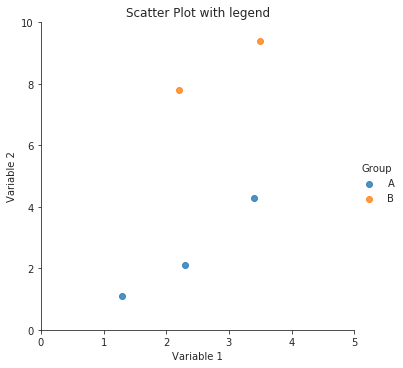

In [32]:
sns.set_style("ticks")
scPlt = sns.lmplot(x="Variable1", y="Variable2", data=mv_df, fit_reg=False, hue = "Group", legend = True)
scPlt.set(xlabel='Variable 1', ylabel='Variable 2')
scPlt.set(xlim = (0,5), ylim = (0,10))
plt.title("Scatter Plot with legend")


### Q10 Using the code above as inspiration create a scatter plot 

Let's compare the frequency of alanine vs Tryptophan. Plot Alanine on the x axis, Tryptophan on the y axis and colour by location. Set the limits on both axis to 0.5. Use our complete dataframe aa_freq_loc_df as the data. Set apropriate title for axes and the plot.

Text(0.5, 1, 'Alanine vs Thryptophan frequency')

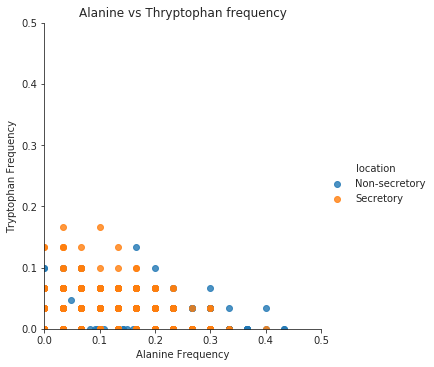

In [33]:
sns.set_style("ticks")
scPlt = sns.lmplot(x="A", y="W", data=aa_freq_loc_df, fit_reg=False, hue = "location", legend = True)
scPlt.set(xlabel='Alanine Frequency', ylabel='Tryptophan Frequency')
scPlt.set(xlim = (0,0.5), ylim = (0,0.5))
plt.title("Alanine vs Thryptophan frequency")


 ### Q11 Move the legend inside the plot 
 
 Instead of using seaborns default legend positon within the **sns.lmplot** function, put the legend by adding the **plt.legend()** function. at the end of your plotting code. 
 
 *Hint* Use loc argument to specify the position. Use the plt.legend? in jupyter to learn which values does the loc argument take

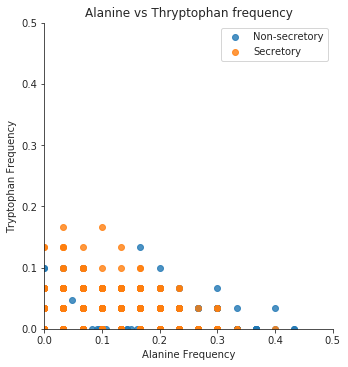

In [34]:
sns.set_style("ticks")
scPlt = sns.lmplot(x="A", y="W", data=aa_freq_loc_df, fit_reg=False, hue = "location", legend = False)
scPlt.set(xlabel='Alanine Frequency', ylabel='Tryptophan Frequency')
scPlt.set(xlim = (0,0.5), ylim = (0,0.5))
plt.title("Alanine vs Thryptophan frequency")
plt.legend(loc = "upper right")

You might notice that even though we have 3058 samples we don't see a lot of points. 

### Q12 Can you think why this is? 

**Answer**: many of them have overlapping values

### Q13 Reduce the opacity of points in the plot 

In order to visualise the number of overlapping points we can reduce the transparency of the dots in the scatter plot.

Try adding the **scatter_kws={'alpha':0.1}** argument to your lmplot function. How does this change the plot? 

Text(0.5, 1, 'Alanine vs Thryptophan frequency')

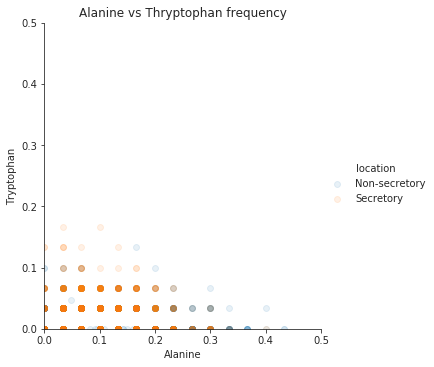

In [35]:
sns.set_style("ticks")
scPlt = sns.lmplot(x="A", y="W", data=aa_freq_loc_df, fit_reg=False, hue = "location", legend = True, scatter_kws={'alpha':0.1})
scPlt.set(xlabel='Alanine', ylabel='Tryptophan')
scPlt.set(xlim = (0,0.5), ylim = (0,0.5))
plt.title("Alanine vs Thryptophan frequency")


**Answer**: Now we don't see such high overlap for higher frequencies and we are able to see there are more points with lower frequency. 

### Q14 Try substituting the value of 0.1 with 1 and 0.01. How does this change the plot? Which one of the three alpha values would you choose for visualisation and why?

Text(0.5, 1, 'Alanine vs Thryptophan frequency')

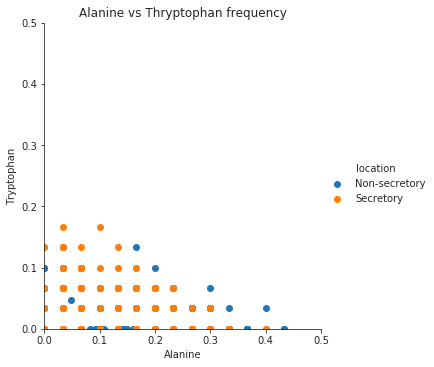

In [36]:
sns.set_style("ticks")
scPlt = sns.lmplot(x="A", y="W", data=aa_freq_loc_df, fit_reg=False, hue = "location", legend = True, scatter_kws={'alpha':1})
scPlt.set(xlabel='Alanine', ylabel='Tryptophan')
scPlt.set(xlim = (0,0.5), ylim = (0,0.5))
plt.title("Alanine vs Thryptophan frequency")


Text(0.5, 1, 'Alanine vs Thryptophan frequency')

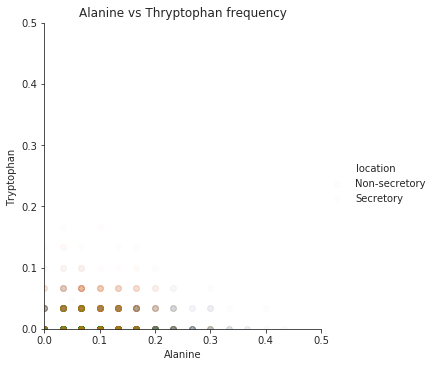

In [37]:
sns.set_style("ticks")
scPlt = sns.lmplot(x="A", y="W", data=aa_freq_loc_df, fit_reg=False, hue = "location", legend = True, scatter_kws={'alpha':0.01})
scPlt = (scPlt.set_axis_labels("Alanine","Tryptophan ").set(xlim=(0,0.5),ylim=(0,0.5)))
plt.title("Alanine vs Thryptophan frequency")


**Answer**: The point transparency changes. With the lowest alpha setting we have maximum transparency so it's very hard to see some points. This is not recommended. The medium transparency is the best option because it reduces the problem of visualising multiple points on top of eachother without loosing data. 

### Q15 Visualise Alanine and Cystein frequency relationship with transparency set to 0.1

Instead of Alanine vs Tryptophan now visualise the Cystein frequnency. 


Text(0.5, 1, 'Alanine vs Cysteine frequency')

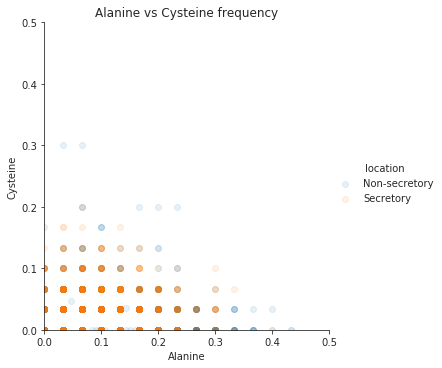

In [38]:
sns.set_style("ticks")
scPlt = sns.lmplot(x="A", y="C", data=aa_freq_loc_df, fit_reg=False, 
                   hue = "location", legend = True, scatter_kws={'alpha':0.1})
scPlt.set(xlabel='Alanine', ylabel='Cysteine')
scPlt.set(xlim = (0,0.5), ylim = (0,0.5))
plt.title("Alanine vs Cysteine frequency")

As you can see the plots don't differ a lot and visualing them one by one would be very tedious since we have 20 amino acids which gives us 190 combinations! We need to find a better way to visualise our data. 


## Correlogram

In order to visulise all the relationships of frequencies use a correlogram like it was shown in the lectures. The code for producing the plot in the lectures is: 
`
sns.pairplot(mv_df, kind="scatter", hue = "Group")
plt.show()
`

### Q16 Create a correlogram of amino acid frequencies 

Using the code above as inspiration create a correlogram of aminoacid frequencies in the aa_freq_loc_df dataset. 




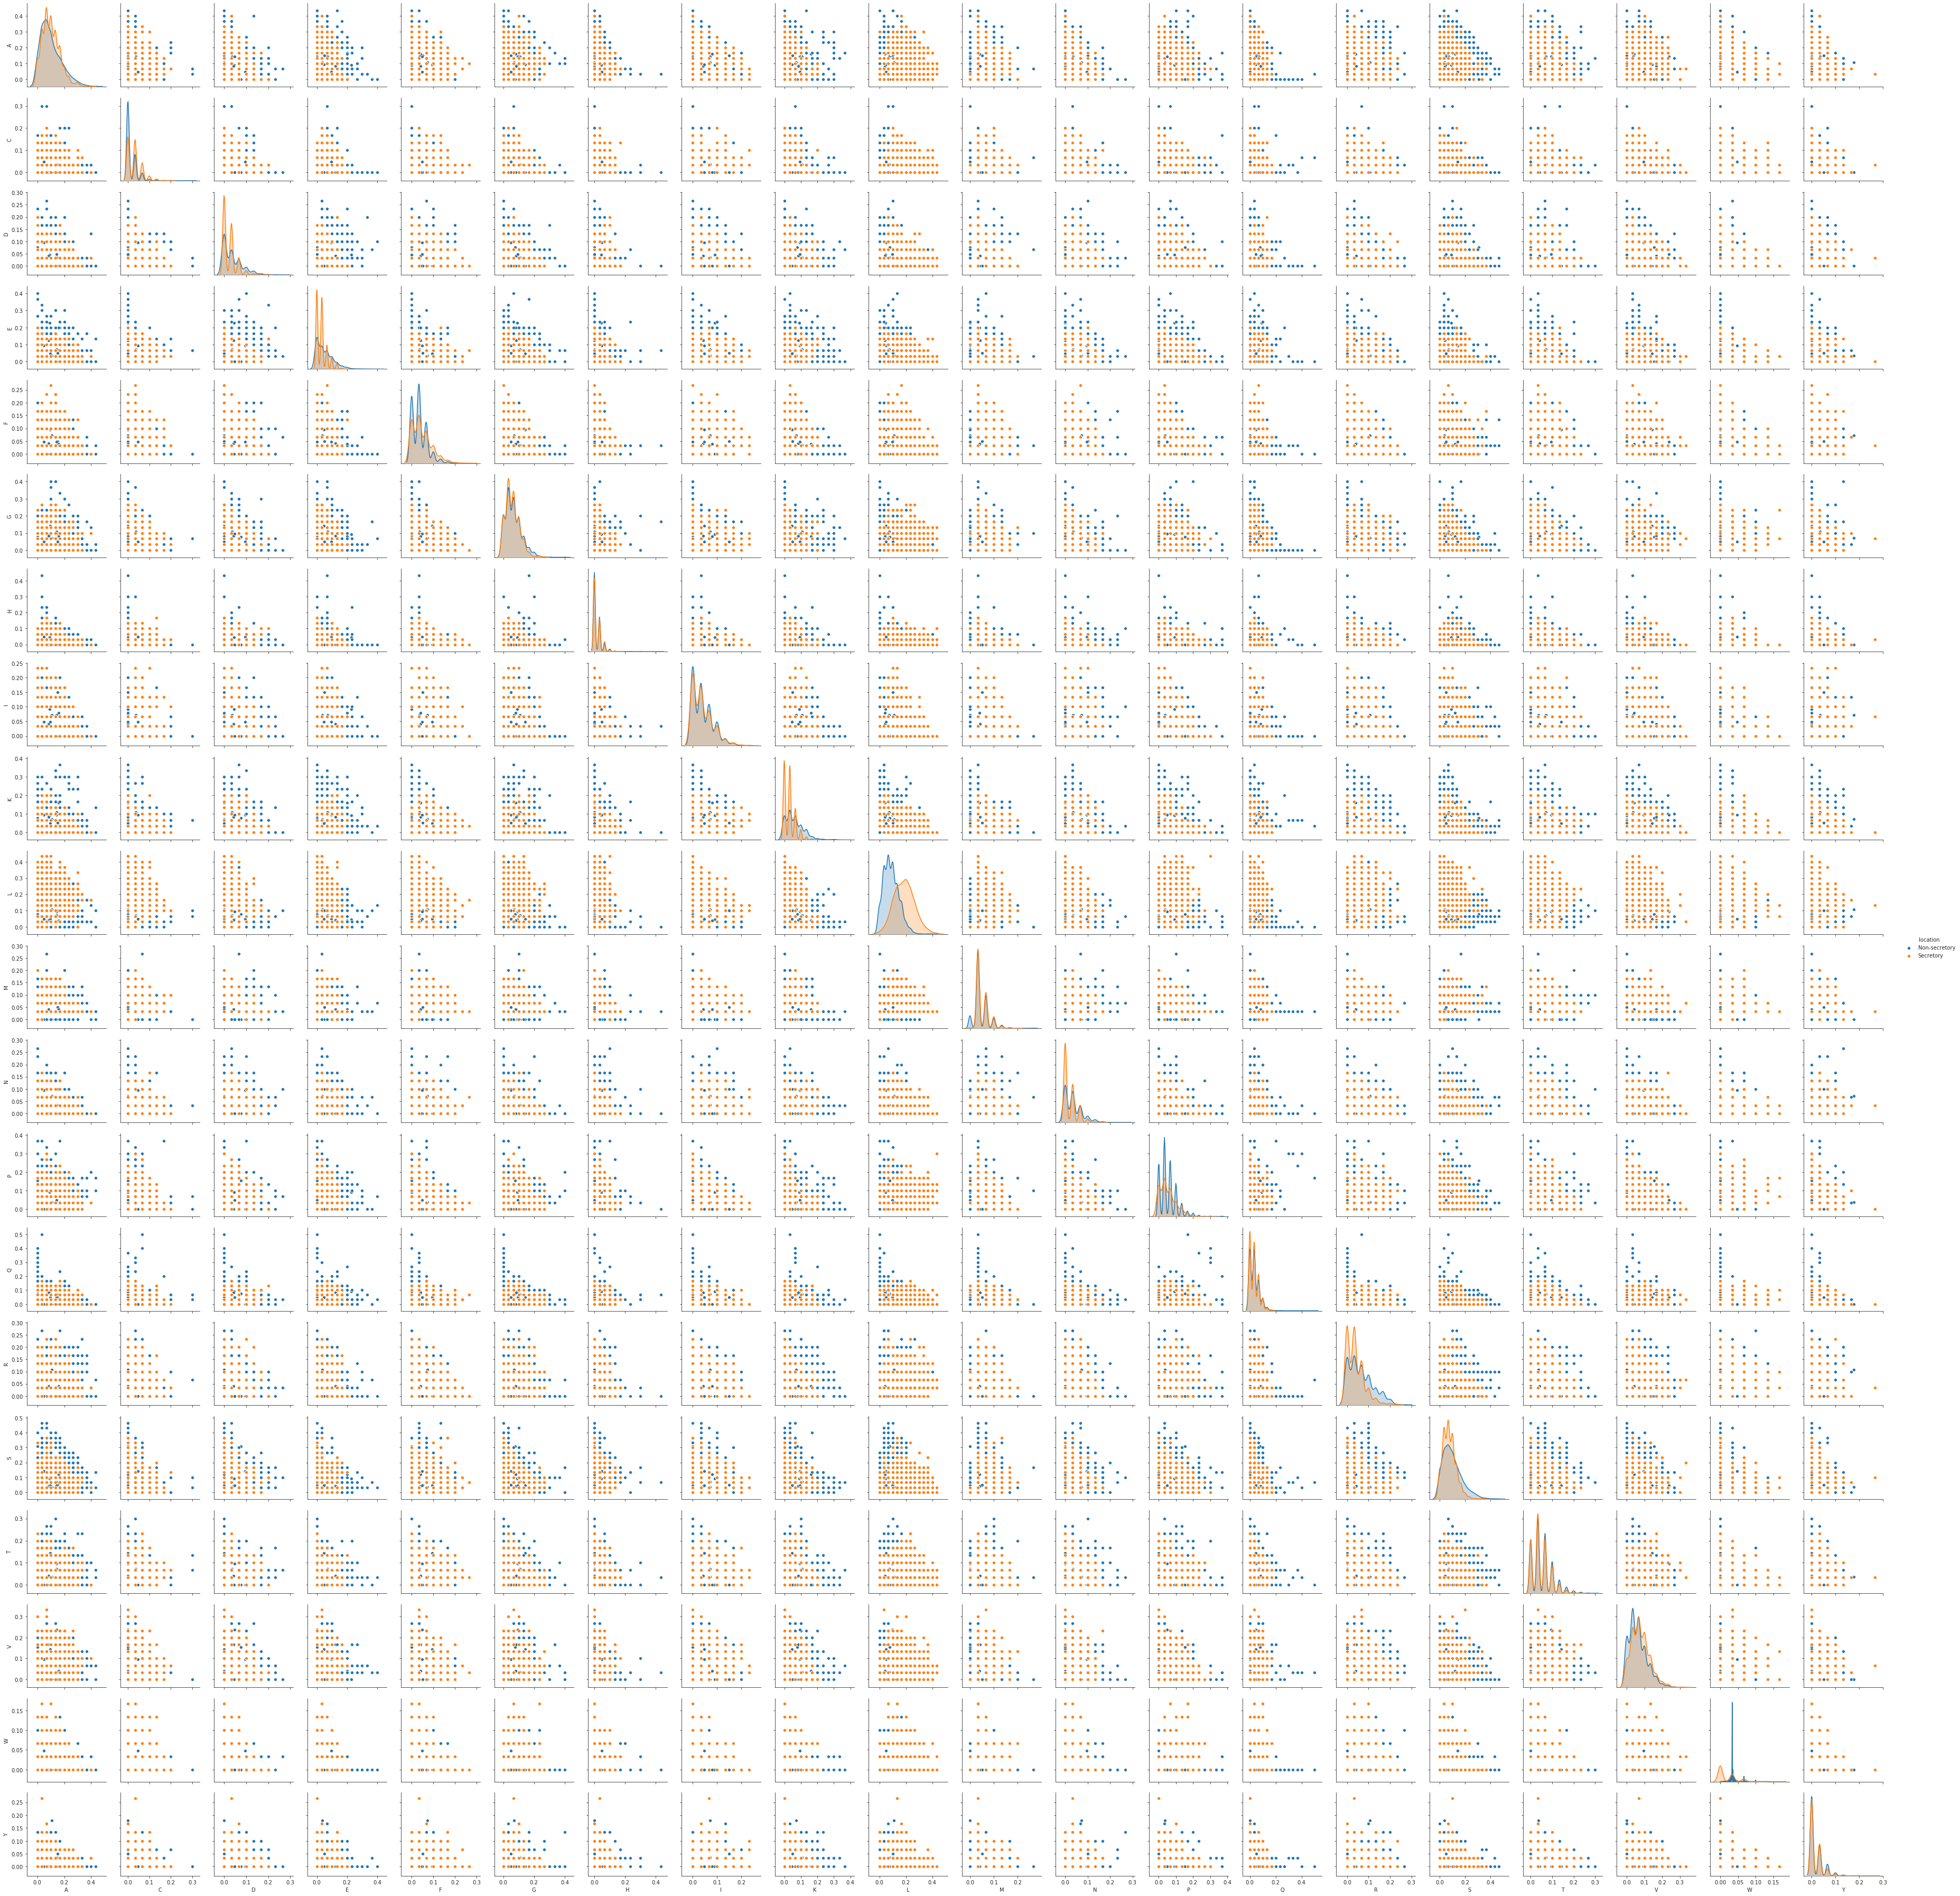

In [39]:
sns.pairplot(aa_freq_loc_df, kind="scatter", hue = "location")
plt.show()


### Q17 How many plots have you visualised? 

**Answer**: 400

As you can see it might be diffucult to draw any conclusions from this high number of scatter plots. For instance som amino acid frequencies seem to differ between Non-secretory and Secretory proteins. However, for visualising relationships between amino acid frequencies, this manner of representation is overwhelming. Since the clarity of information is not good and we cannot visualise any relationships this manner in a clear an coherent way we would say for this type of data, scatter plot visualisations are not optimal.


## Histogram

The code used to produce histograms in the lecture slides is: 

`
sns.set_style("ticks")
hist = sns.distplot(mv_df['Variable1'], bins = 10, hist=True, kde = False)
hist.set(xlabel='Variable 1', ylabel='Count')
plt.title("Histogram variable 1")`
### Q18 Create a histogram of the data for Alanine 

Using as inspitation the code from above create a historgram of the Alanine frequency in the protein data: aa_freq_loc_df. 



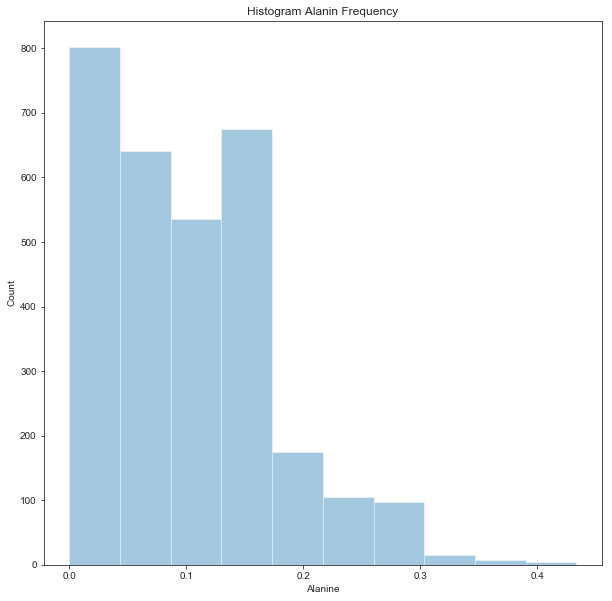

In [54]:
sns.set_style("ticks")
hist = sns.distplot(aa_freq_loc_df['A'], bins = 10, hist=True, kde = False)
hist.set(xlabel='Alanine', ylabel='Count')
plt.title("Histogram Alanin Frequency")
plt.savefig("Histogram_alanin.png")

### Q19 increase the bin number to 100 and visualise the plot again. Why has the y axis changed?  

Text(0.5, 1.0, 'Histogram Alanin Frequency')

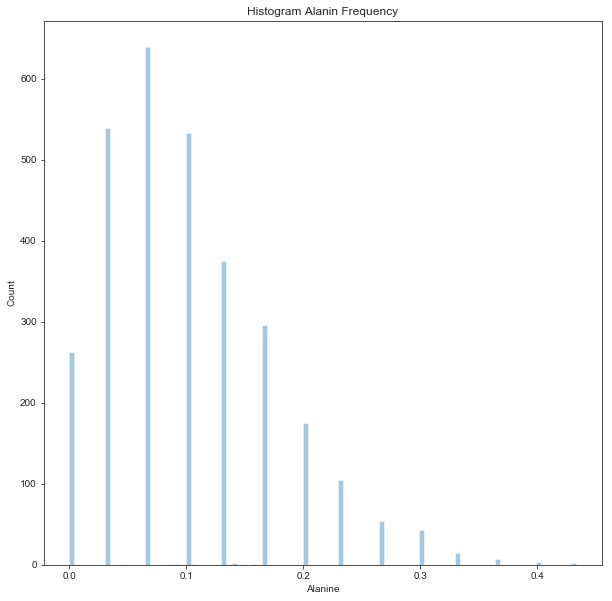

In [55]:
sns.set_style("ticks")
hist = sns.distplot(aa_freq_loc_df['A'], bins = 100, hist=True, kde = False)
hist.set(xlabel='Alanine', ylabel='Count')
plt.title("Histogram Alanin Frequency")


**Answer**: By increasing the number of bins we reduce the maximum count in the individual bins. 

## Q20 Create a density plot with Alanine frequency. 

*Hint* code used to generate the density plot from the lectures: 

`sns.set_style("ticks")
dens_plt = sns.kdeplot(mv_df['Variable1'], shade=True)
dens_plt.set(xlabel = "Value", ylabel = "Probability Density")
plt.title("Density plot Var 1 ")`





Text(0.5, 1.0, 'Density plot Alanine')

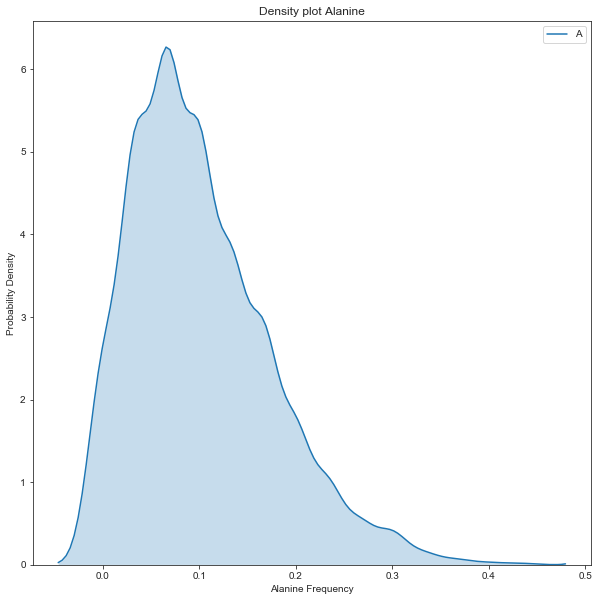

In [52]:
sns.set_style("ticks")
dens_plt = sns.kdeplot(aa_freq_loc_df['A'], shade=True)
dens_plt.set(xlabel = "Alanine Frequency", ylabel = "Probability Density")
plt.title("Density plot Alanine")

### Q21 What are the diffences of the density plot from the histogram? 

**Answer** The plot is contious. The Y axis shows Probability density instead of the counts. There is no more bins to be specified. 

You can also create density plots (and histograms) with multiple variables on the same axis. 

`sns.set_style("ticks")
dens_plt = sns.kdeplot(mv_df['Variable1'], shade=True)
dens_plt = sns.kdeplot(mv_df['Variable2'], shade=True)
dens_plt.set(xlabel = "Variable value", ylabel = "Probability Density")
plt.title("Density plot Variable 1 and 2")`

### Q22 create a density plot with Alanine and Tryptophan shown on the same axis. Change the area colours to red and blue respectively by adding the arguments color = "r" and color = "b" to the kdeplot function, respectively

*Hint* use the color argument when creating the plot. 


Text(0.5, 1.0, 'Density plot Alanine')

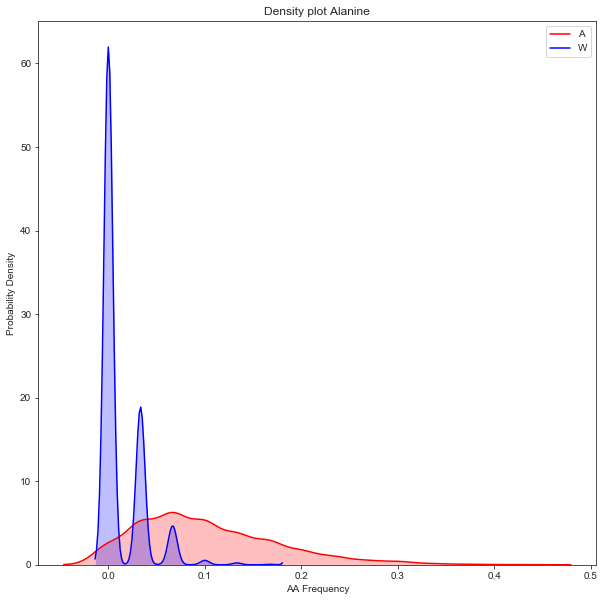

In [56]:
sns.set_style("ticks")
dens_plt = sns.kdeplot(aa_freq_loc_df['A'], shade=True, color = "r")
dens_plt = sns.kdeplot(aa_freq_loc_df['W'], shade=True, color = "b")
dens_plt.set(xlabel = "AA Frequency", ylabel = "Probability Density")
plt.title("Density plot Alanine")

Since we have a lot of variables (20 amino acids) it would be better if we don't need to specify each density plot by hand. You can use a **for** loop to iterate through the column names. An example from todays teaching material is created by: 
`
sns.set_style("ticks")
for col in list(mv_df)[:-1]:
    dens_plt = sns.kdeplot(mv_df[col], shade=True)
    
dens_plt.set(xlabel = "AA Frequency", ylabel = "Probability Density")
`

The list of column names is subseted by the [:-1] because our last column name was the "Group" which is a categorical variable we need to exclude from the density plot which takes in numerical variables. 

### Q23 Create a density plot of all amino acid frequnencies 

*Hint* Using the inspiration above iterate trhough the column names removing the column which has categorical data. 

*Hint2* For moving the legend outside the plot paste this after the for loop: 

`plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left, borderaxespad=0.)`

If interested how this works, again you can use the ? in jupyter to get information on the plt.legend function

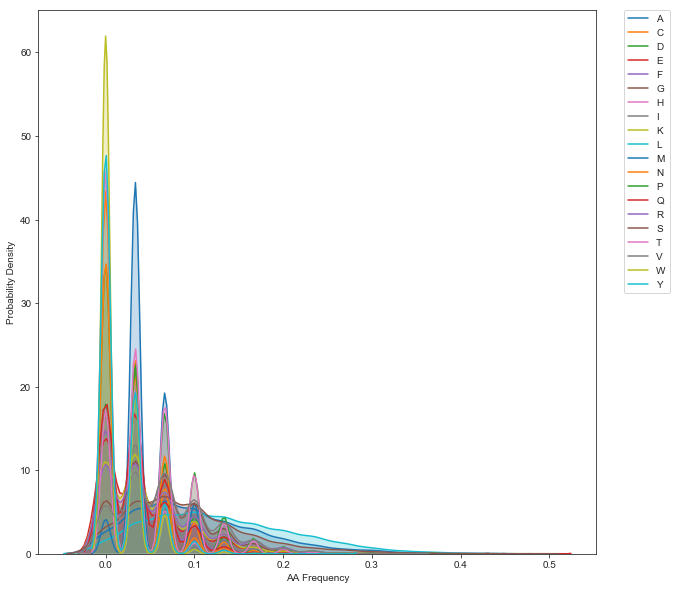

In [58]:
sns.set_style("ticks")
for col in list(aa_freq_loc_df)[1:]:
    dens_plt= sns.kdeplot(aa_freq_loc_df[col], shade=True)

dens_plt.set(xlabel = "AA Frequency", ylabel = "Probability Density")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

We have now created a plot which contains all the density distributiions of amino acids in the dataframe
### Q24 Can we use this plot to say anything about the amino acid usage in secretory vs non-secretory proteins? 

**Answer** No, because this plot shows distributions of density for all proteins at once. 

## Box plot

In todays lecture we have also mentioned boxplots. Specifically three types: 
1) Group on the x axis
2) Variable on the x axis 
3) all variables on the X axis grouped by categorical variable. 

### Q25 Considering the data frame that we have are analysing, which two types of boxplot are suitable for plotting our data? And which one of those two do you think will reveal most information about our dataset and why? 

**Answer**: 2 and 3. 3 because it will also reveal differences between groups, in our case Non-secretorial and Secretorial proteins. 

### Q26 Genereate a boxplot with variables on the X axis grouped by location 

To produce the boxplot from today's lecture we had to transform the data frame from what is known as the "tidy" to "long" format. This is achieved using the **melt** function. (Remember ?) When data is transformed from the tidy to long format, each row is and obervation and each column is a variable. 

Tidy format             |  Long Format
:-------------------------:|:-------------------------:
<img src = "Figures_2020_05_19/DF_tidy.png">  |  <img src = "Figures_2020_05_19/DF_long.png"> 

`
mv_df_long = pd.melt(mv_df, "Group", var_name="Variables", value_name="Value")
`

This new dataframe can now be plotted with the **boxplot** function: 

`
sns.set_style("ticks")
bx_plt = sns.boxplot(x="Variables", hue="Group", y="Value", data=df_long, palette= "Set2")
bx_plt.set( ylabel = "Value")
plt.title("Variables across groups")
`

### Q27 Q Use the code above as inspiration, convert the aa_freq_loc_df to the long format, store it in aa_freq_loc_df_long and plot grouped by location. Name the variable AminoAcids and values Frequency. 

*Hint* using the example from the density plot, move the legend outside of plot area. 

In [61]:
aa_freq_loc_df_long = pd.melt(aa_freq_loc_df, "location", var_name = "AminoAcids", value_name = "Frequency")

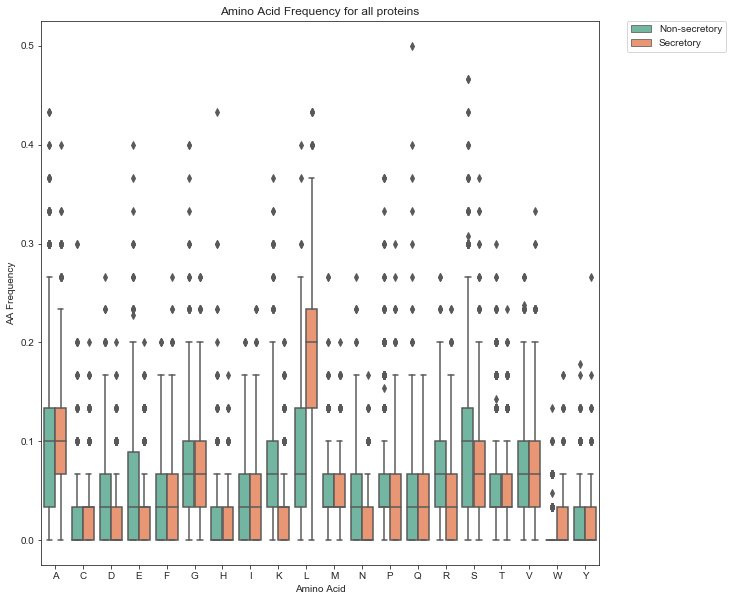

In [62]:
sns.set_style("ticks")
bx_plt = sns.boxplot(x="AminoAcids", hue="location", y="Frequency", data=aa_freq_loc_df_long, palette= "Set2")
bx_plt.set(ylabel = "AA Frequency", xlabel = "Amino Acid")
plt.title("Amino Acid Frequency for all proteins")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

### Q28 Which amino acid frequency is mostly different between Non-secretory and Secretory proteins? 


**Answer** Leucine


## Violin plot 
In order to also understand group size distribution, we might resort to the violin plot instead of the boxplot. 

### Q29 Using the **sns.violinplot** function, create a grouped violin plot for all amino acids 

*Hint* It is almost the same as creating a boxplot of the same type, you just need to substitute the box plot function with the violin plot


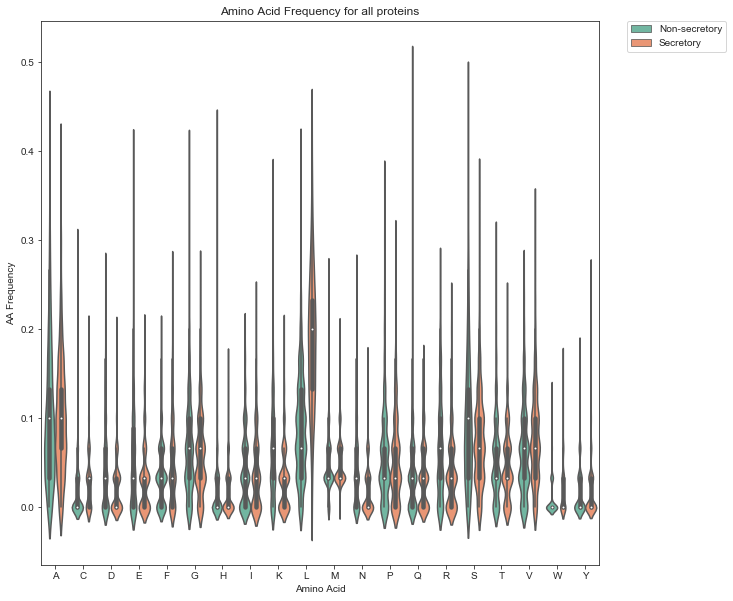

In [63]:
sns.set_style("ticks")
vio_plt = sns.violinplot(x="AminoAcids", hue="location", y="Frequency", data=aa_freq_loc_df_long, palette= "Set2")
vio_plt.set(ylabel = "AA Frequency", xlabel = "Amino Acid")
plt.title("Amino Acid Frequency for all proteins")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

## Parallel plot 

The plot in today's lecture is generated by the following code: 

`
parallel_coordinates(mv_df, "Group", colormap= plt.get_cmap("Set2"))`


### Q30 Create a parallel plot of amino acid frequencies and colour based on the protein group 

*Hint use the tidy data instead of the long format*
*Hint* Use the code above as inspiration


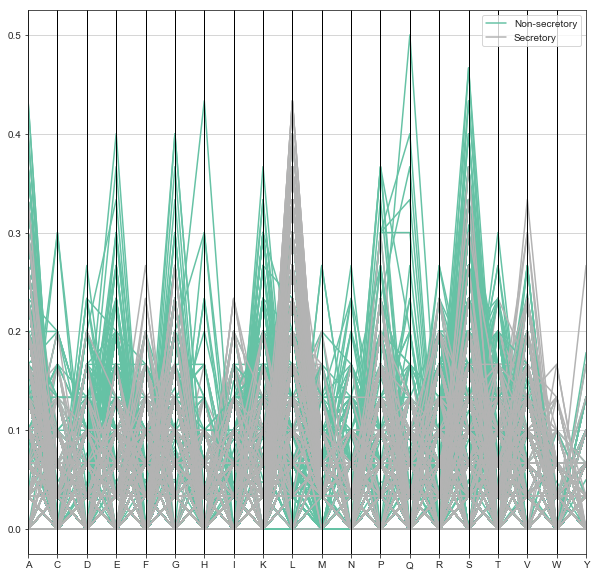

In [64]:
parallel_coordinates(aa_freq_loc_df, "location", colormap= plt.get_cmap("Set2"))

### Q31 Can you see the same differences in the Leucine Frequencies as you can see in the boxplot? Why do you think that is? 


**Answer** The Leucine is completely covered by the Secretory Protein frequencies because the lines are plotted over eachother. One solution would be increasing the transparency of lines. 


Let's try and calculate the mean expression per group and plot the trends on the parallel plot. This way we might get better visualisation but we might lose information on individual points. 

We need to group values in the dataframe by the categorical variables first, and then apply the mean function on the grouped data. 

`
mv_df_mean =  mv_df.groupby('Group', as_index=False).mean()
sns.set_style("ticks")
parallel_coordinates(mv_df_mean, "Group", colormap= plt.get_cmap("Set2"), axvlines=False)
`


### Q32 create a parallel plot of mean amino acid frequencies by group 

*Hint* use the ? option in jupyter to get more information of the pd.DataFrame.groupby function if you would like to know more about the options. 


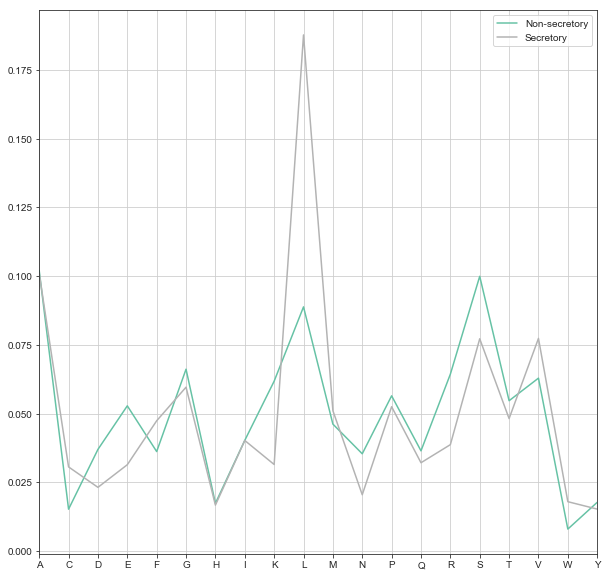

In [65]:
aa_freq_loc_df_mean = aa_freq_loc_df.groupby('location', as_index=False).mean()
parallel_coordinates(aa_freq_loc_df_mean, "location", colormap= plt.get_cmap("Set2"), axvlines=False)



### Q33 What can you observe about the Leucine frequencies now? Is it more limilar to the boxplot or the parallel plot with all the points?

**Answer** It is more clear to see that there is a difference in the Leucine frequency between the two protein groups. This obesrvation is the same as we have gotten from the boxplot. 

## PCA 

Another popular visualisation technique is the dimensionality reduction, Principal components analysis. For datasets with large number of observables it shifts the coordinate system along the so that the first dimension aligns with the direction of maximal variance in the data - known as Principal Component 1 (PC1). The next coordinate is othogonal to the first Principal component and explains less variance in the data (PC2). Same follows for PC3 and so on until all the dimensions of the data are explained. In our case we have 20 observabels corresponding to 20 Amino Acid frequencies. 

Because we are visualising in 2D e only need to choose 2 principal components along which we can visulise the points (the proteins). 

We will follow these steps: 

1. Separate data into numerical and categorical variables
2. Normalize the data by the mean and scale by the standard deviation
3. Fit the PCA and visualize the Principal components. 

First we need to separate the categorical variable from the observables. We will store observables in x, and categorical variable in y. 


`observables = list(mv_df)[:-1]
#Separating out the features
x = mv_df.loc[:, observables].values
#Separating out the target
y = mv_df.loc[:,['Group']].values`


### Q34 Separate the data in x (observables) and y (categorical data). What is the shape of x? Does x have column names? 


In [66]:
observables = list(aa_freq_loc_df)[1:]
# Separating out the features
x = aa_freq_loc_df.loc[:, observables].values
# Separating out the target
y = aa_freq_loc_df.loc[:,['location']].values

In [67]:
x.shape

(3058, 20)

In [68]:
list(x)

[array([0.13333333, 0.        , 0.        , 0.        , 0.03333333,
        0.03333333, 0.        , 0.03333333, 0.03333333, 0.06666667,
        0.06666667, 0.03333333, 0.03333333, 0.        , 0.06666667,
        0.3       , 0.06666667, 0.1       , 0.        , 0.        ]),
 array([0.23333333, 0.03333333, 0.        , 0.        , 0.03333333,
        0.06666667, 0.        , 0.1       , 0.03333333, 0.06666667,
        0.03333333, 0.        , 0.06666667, 0.        , 0.06666667,
        0.26666667, 0.        , 0.        , 0.        , 0.        ]),
 array([0.16666667, 0.03333333, 0.        , 0.        , 0.03333333,
        0.        , 0.03333333, 0.        , 0.        , 0.06666667,
        0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.1       ,
        0.26666667, 0.        , 0.16666667, 0.        , 0.        ]),
 array([0.26666667, 0.03333333, 0.        , 0.        , 0.06666667,
        0.        , 0.        , 0.03333333, 0.06666667, 0.03333333,
        0.03333333, 0.03333333, 0.03333333

**Answer**: There are 2058 rows and 20 columns. There are no column names because our data is stored in the numpy array instead of a dataframe. 

You can check the type of variable x by using the function type(). You can see that x is no longer a pandas dataframe but a numpy array:

In [69]:
type(x)

numpy.ndarray

Now that the numerical data (amino acid frequencies) are stored in x, we need to normalize and sacle the data. 
We need to normalize by the mean and scale by the standard deviation. 


In [70]:
x_scaled = StandardScaler().fit_transform(x)

### Q35 Use information on the StandardScaler? function to find out which argurments it uses by default? Have be used both the mean and standard deviation? 

In [72]:
StandardScaler?

**Answer**: Both the with_mean and with_std arguments are by default set to true, therefore we have indeed normalized and scaled the features. 


### Q36 What is the shape of the scaled observables? Is it different from the unscaled data? 

In [73]:
x_scaled.shape

(3058, 20)

**Answer**: Shape of both are 3058, 20)

### Q37 Inspect the mean and standard deviation of the original numerical data x and the normalized and scaled data x_scaled. What is the mean and standard deviation in both cases? 

*Hint* Use np.mean and np.std on the data to calculate the mean and standard deviation
*Hint*: Observe the standard deviation in the scaled data and comment on the value. 

In [74]:
np.mean(x), np.std(x)

(0.04997323569715655, 0.05565454006358121)

In [75]:
np.mean(x_scaled), np.std(x_scaled)

(8.527442250619907e-17, 1.0)

**Answer**: mean(x)= 0.04997323569715655 std(x) = 0.05565454006358121 mean(x_scaled)= 8.527442250619907e-17 std(x_scaled)= 1.0. 

We now need to perform principal compoents analysis on the scaled data.

`#define pca number of components:
pca_scaled = decomposition.PCA(n_components=3)

#fit the PCA on the scaled data:
principalComponents_scaled = pca_scaled.fit_transform(x_scaled)

#convert the PCA result into a dataframe for easier manipulation
principalDf_scaled = pd.DataFrame(data = principalComponents_scaled)

#add the categorical variables that we can use to label the data.
finalDf_scaled = pd.concat([principalDf_scaled, mv_df[["Group"]]], axis = 1)`


### Q38 use the code from the lectures as inspiration to perform PCA on x_scaled. Set the number of components to 12. 




In [76]:
pca_scaled = decomposition.PCA(n_components=20)
principalComponents_scaled = pca_scaled.fit_transform(x_scaled)

principalDf_scaled = pd.DataFrame(data = principalComponents_scaled)

finalDf_scaled = pd.concat([principalDf_scaled, aa_freq_loc_df[["location"]]], axis = 1)


### Q39 What is the maximum number of components we can use in the PCA? Why? 

**Answer** 20, because we have 20 features(dimensions) of data. 

### Q40 What is the shape of the finalDf_scaled and what do the column names correspond to? 

**Answer**: 3058 rows and 13 columns The first 12 columns are Principal Componenets and the last one is the location variable. 

### Q41 Visualize PCA with PC1 and PC2. How much of the variance is explained by PC1 and PC2? Can we see a clear separation between secretory and non-secretory proteins? 

*Hint* Use the code from the lectures as inspiration:

`#Percent of variance explained by PC1 and PC2 with indices 0 and 1, respectively
per_PC1 = str(round(pca_scaled.explained_variance_ratio_[0]*100, 2)) 
per_PC2 = str(round(pca_scaled.explained_variance_ratio_[1]*100, 2))

fig, ax = plt.subplots(figsize=(10,10))
#define number of colours in the colour pallete:
cmap = sns.color_palette("hls", 2) 
p = sns.scatterplot(x=0, y=1, # Visualise PC1: index 0 and PC2: index 1
                     hue="Group",
                     palette=cmap, s=100,
                     data=finalDf_scaled, 
                   alpha = 0.5)

#set axis outside the plot
p.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
#make axis lables using per_PC1 and per_PC2 variables
p.set(xlabel="".join(["PC1 (",per_PC1,"%)"]), ylabel="".join(["PC2 (",per_PC2,"%)"])) 
plt.tight_layout()
p.get_figure().savefig("Teaching_figures/PCA_on_scaled_data.png")`

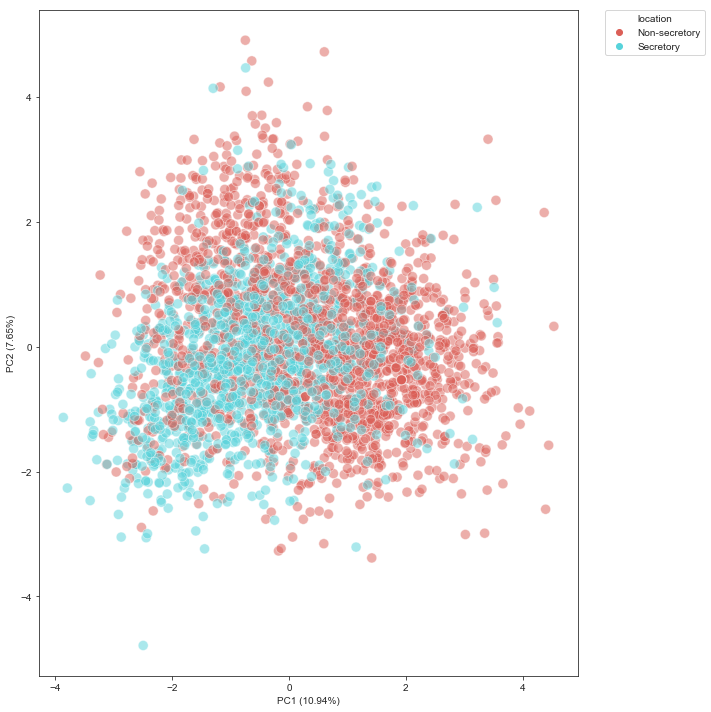

In [77]:
per_PC1 = str(round(pca_scaled.explained_variance_ratio_[0]*100, 2))
per_PC2 = str(round(pca_scaled.explained_variance_ratio_[1]*100, 2))

fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.color_palette("hls", 2)
p = sns.scatterplot(x=0, y=1,
                     hue="location",
                     palette=cmap, s=100,
                     data=finalDf_scaled, 
                   alpha = 0.5)

p.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p.set(xlabel="".join(["PC1 (",per_PC1,"%)"]), ylabel="".join(["PC2 (",per_PC2,"%)"]))
plt.tight_layout()



### Q42 using the code above as inspiration plot PC1 vs PC3 on the PCA plot. How much variance is explained by PC3? 

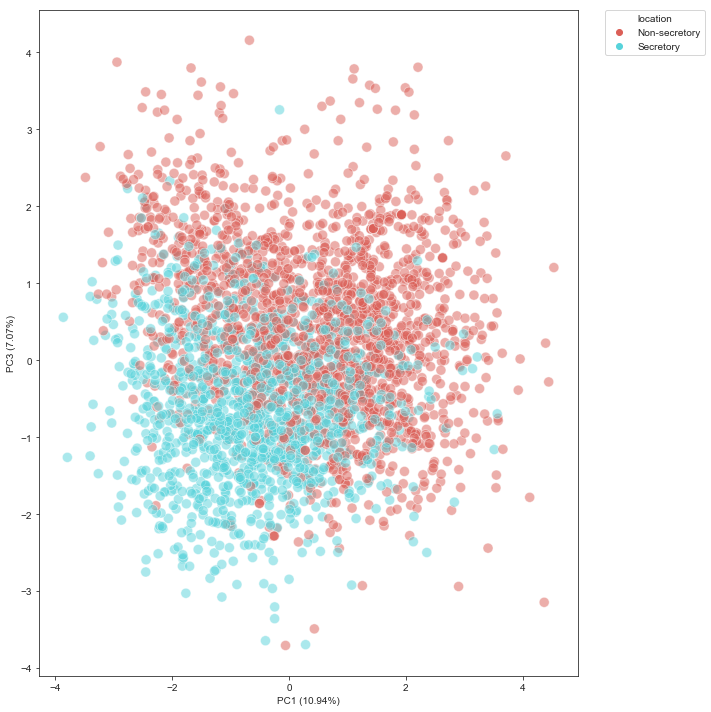

In [78]:
per_PC1 = str(round(pca_scaled.explained_variance_ratio_[0]*100, 2))
per_PC3 = str(round(pca_scaled.explained_variance_ratio_[2]*100, 2))

fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.color_palette("hls", 2)
p = sns.scatterplot(x=0, y=2,
                     hue="location",
                     palette=cmap, s=100,
                     data=finalDf_scaled, 
                   alpha = 0.5)

p.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p.set(xlabel="".join(["PC1 (",per_PC1,"%)"]), ylabel="".join(["PC3 (",per_PC3,"%)"]))
plt.tight_layout()


**Answer**: 7.07%

### Q43 Plot the cumulative variance using the code bellow. How many Principal Components are needed to explain at least 60% of the variance in the data? 

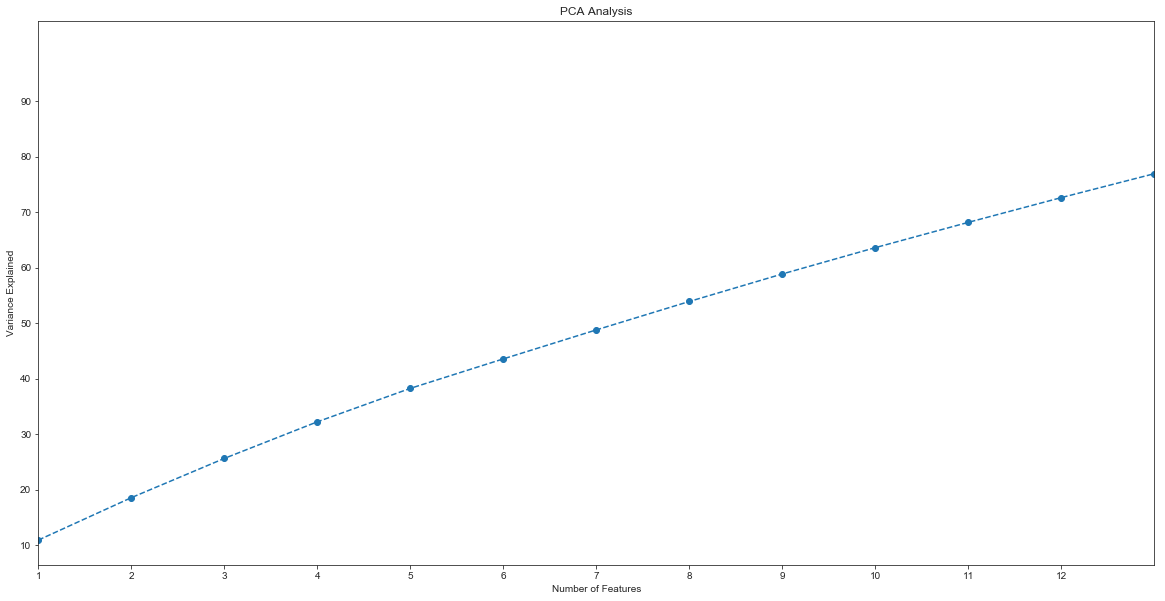

In [84]:
var = np.cumsum(pca_scaled.explained_variance_ratio_*100)
plt.figure(figsize=(20,10))
plt.ylabel('Variance Explained')
plt.xlabel('Number of Principal ComponentsFff')
plt.xlim(0,12)
plt.xticks(np.arange(0, 12, step=1), np.arange(1,13))
plt.yticks(np.arange(0, 100, step=10), np.arange(0,110, step = 10))

plt.title('PCA Analysis')
plt.plot(var, marker='o', linestyle='--')
plt.show()

**Answer**: At least 9

## t-SNE

We will now proceed to do tSNE as part of the scikit-learn library. In order to familiarise our selves with the options of the function run TSNE? bellow. The parameters we're mostly interested in are the perplexity, number of iterations and number of components. In the end of the documentation shows how to use TSNE to embed x (our data) into x_embeded. 

### Q44 Use the code in the example in documentation to embed the data x into 2 dimensional space using tSNE. 

Set the number of iterations to 2000 and perplexity to 50. Store the tSNE embedding into x_embedded. 

*Hint* x_embedded = TSNE(arguments you need to use).fit_transform(x)
*Hint* You only need the 4$ˆ{th}$ line of the example. 

In [85]:
TSNE?

In [87]:
x_embedded = TSNE(n_components = 2, n_iter =  2000, perplexity = 50 ).fit_transform(x)

### Q45 what is the shape of the embedded data? Why do we have that number of columns? 


In [88]:
x_embedded.shape

(3058, 2)

**Answer**: Number of rows: 3058 and number of columns 2. Because we have embedded into 2 dimension we have only 2 columns now. We have reduced the number of dimensions to 2.

You might notice that this takes some time to run. If you rememeber from the lectures we have mentioned that when dealing with data with a large number of points a good idea is to do PCA dimensionality reduction before applying the t-SNE algorithm. This speedup will become more evident when dealing with even larger datasets. However, keep in mind that these are two different dimensionality reduction techniques therefore it's important to understand your data and when this speed-up is justified. You should be careful of the number of dimensions you are reducing the data with the PCA prior to tSNE, as you do not want to reduce the number of dimensions already to 2 or 3 which would make the tSNE redundant. 


Now, we have already done PCA on the frequencies data before by running the following code: 

`
pca_scaled = decomposition.PCA(n_components=12)
principalComponents_scaled = pca_scaled.fit_transform(x_scaled)
`



### Q46 Use the principalComponents_scaled data instead of x in your TSNE embedding. What is the shape of x_embedded now? 

In [89]:
x_embedded = TSNE(n_components = 2, n_iter = 2000, perplexity = 50 ).fit_transform(principalComponents_scaled)

In [90]:
x_embedded.shape

(3058, 2)

**Answer**: Rows: 3058 and columns 2. 

Visualise the results: 

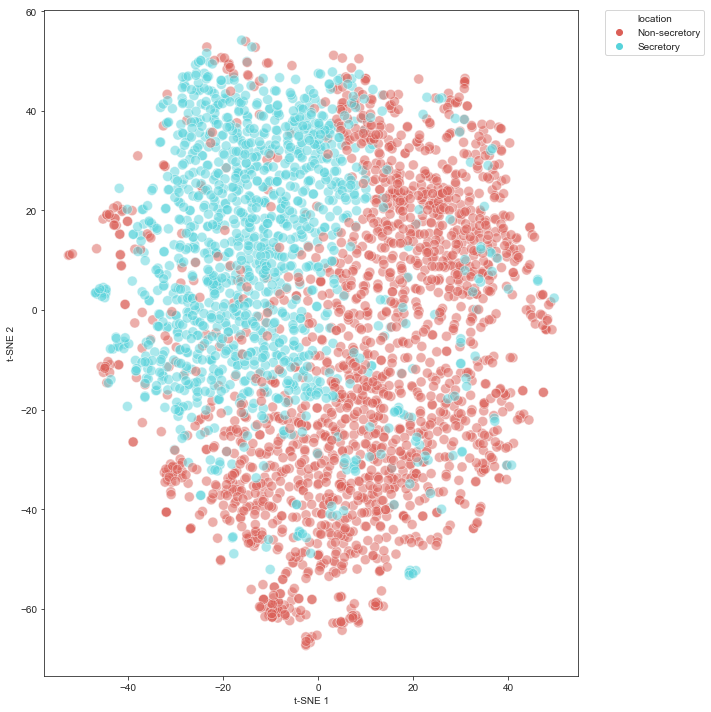

In [92]:
#convert tSNE result into pandas dataframe
tsne_df = pd.DataFrame(data = x_embedded)
#append the categorical variables to the dataframe
tSNE_finalDf = pd.concat([tsne_df, aa_freq_loc_df[["location"]]], axis = 1)

#visualize the tSNE plot
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.color_palette("hls", 2) # notice that there are only 2 colours because we have 2 protein locations
p = sns.scatterplot(x=0, y=1,
                     hue="location",
                     palette=cmap, s=100,
                     data=tSNE_finalDf, 
                   alpha = 0.5)

p.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p.set(xlabel="t-SNE 1", ylabel="t-SNE 2")
plt.tight_layout()



### Q47 Run the tsne embedding again in the same way in the cells bellow and visualise the tSNE plot. Is the plot exactly the same as before? 

In [98]:
x_embedded = TSNE(n_components = 2, n_iter = 2000, perplexity = 50 ).fit_transform(principalComponents_scaled)

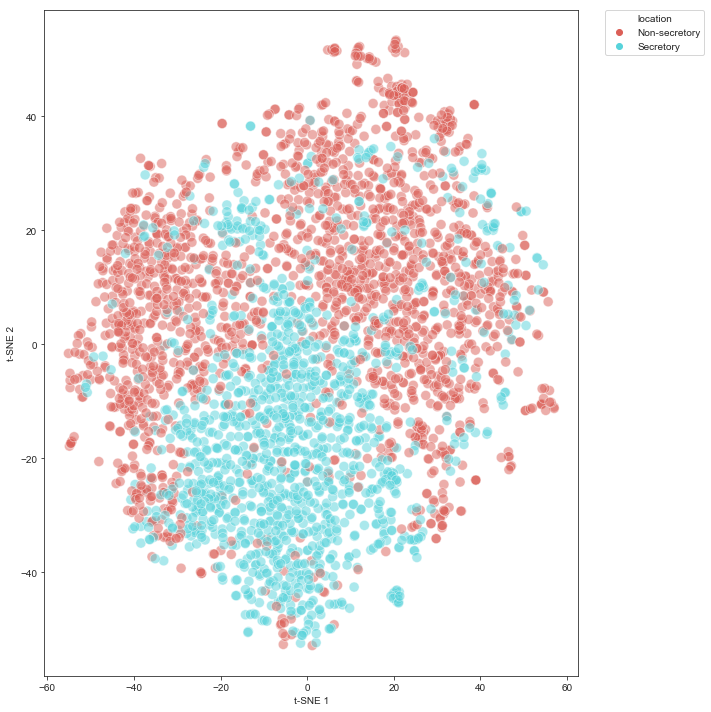

In [99]:
#convert tSNE result into pandas dataframe
tsne_df = pd.DataFrame(data = x_embedded)
#append the categorical variables to the dataframe
tSNE_finalDf = pd.concat([tsne_df, aa_freq_loc_df[["location"]]], axis = 1)

#visualize the tSNE plot
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.color_palette("hls", 2) # notice that there are only 2 colours because we have 2 protein locations
p = sns.scatterplot(x=0, y=1,
                     hue="location",
                     palette=cmap, s=100,
                     data=tSNE_finalDf, 
                   alpha = 0.5)

p.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p.set(xlabel="t-SNE 1", ylabel="t-SNE 2")
plt.tight_layout()



**Answer** The plots are different. 

Because the tSNE alorithm starts by choosing a random point in the dataset, each time we start the algorithm it will choose based on the random seed of the computer. Therfore we need to set the value of the random seed to a fixed value within the TSNE function, so that our results are reproducible. 

### Q48 Using the random_state argument in the TSNE function set the random seed to 42. Rerun the tSNE and generate the plot as before. Does the tSNE plot change if you rerun the cells again? 


In [95]:
x_embedded = TSNE(n_components = 2, n_iter = 2000, perplexity = 50, random_state = 42 ).fit_transform(principalComponents_scaled)


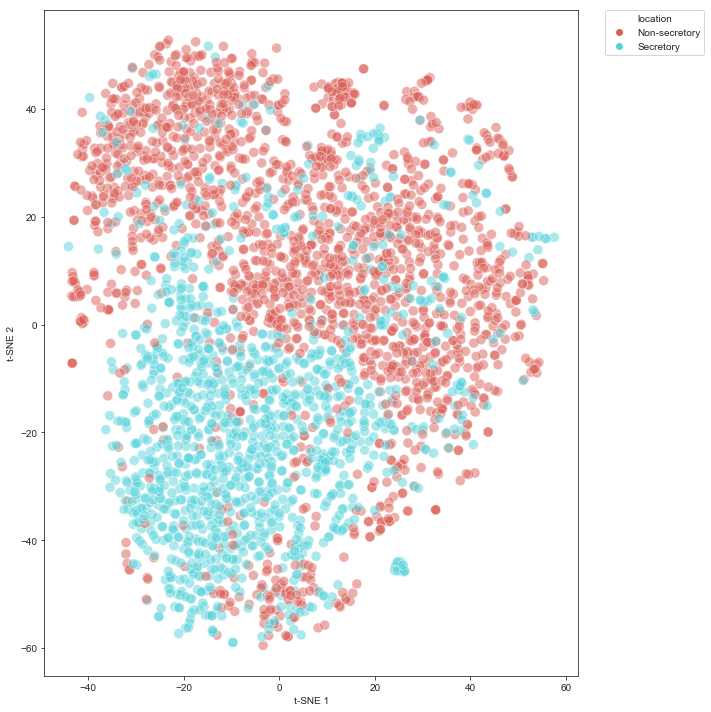

In [96]:
#convert tSNE result into pandas dataframe
tsne_df = pd.DataFrame(data = x_embedded)
#append the categorical variables to the dataframe
tSNE_finalDf = pd.concat([tsne_df, aa_freq_loc_df[["location"]]], axis = 1)

#visualize the tSNE plot
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.color_palette("hls", 2)
p = sns.scatterplot(x=0, y=1,
                     hue="location",
                     palette=cmap, s=100,
                     data=tSNE_finalDf, 
                   alpha = 0.5)

p.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p.set(xlabel="t-SNE 1", ylabel="t-SNE 2")
plt.tight_layout()



**Answer**: The plot stays the same now. 

## UMAP

Even though we can see more separation between groups with the tSNE analysis compared to PCA, there is still overlap. To circumvent this probably we would have to keep the original data PCA unscaled, increase the perplexity and number of iterations which is are all computationally expensive techniques. 

UMAP seeks to improve on the limitations of tSNE, by implementing a slighly different learning algorithm. It also doesn't necesarilly start with random initialisation, so there is in theory no need to set the random seed as with tSNE. This being said, some of the more specialised arguments of the UMAP functon might require random initialisation so it is good practice to regardless set the random_state to a fixed value, so that you are certain you are always able to reproduce the same UMAP low-dimensional embedding. 

### Q49 Create a UMAP embedding of the x data using the code bellow as inspiration: 

`
x_embedded_UMAP = umap.UMAP(arguments).fit_transform(x)
`
Set the following parameters: 
* number of neighbours: 20
* number of final dimensions: 2 
* random state: 42
* metric: manhattan
* number of epocs: 700
* minimal distance: 0.01 



*Hint* look at the documentatiton of UMAP using umap.UMAP? in the cell below and find the arguments you need to put into the UMAP function. 






In [102]:
umap.UMAP?

In [103]:
x_UMAP_embedded = umap.UMAP(n_neighbors = 20, n_components =2, 
                            random_state = 42, metric = 'manhattan',
                            n_epochs = 700, min_dist = 0.01).fit_transform(x) 


### Q49 Now plot the UMAP result using the code bellow. Do you see any clear separation of clusters with no overlap? Having this in mind you think that the separation of proteins has improved compared to the use of PCA and tSNE? 

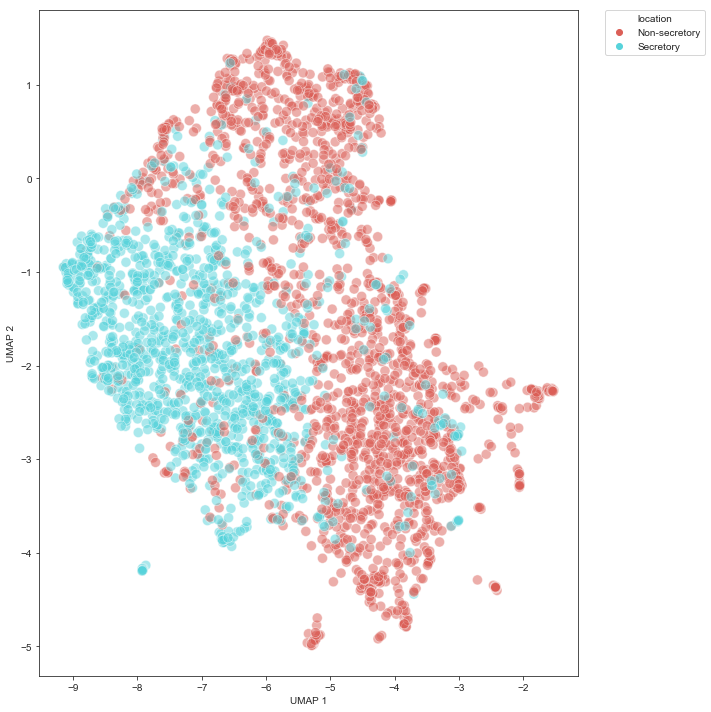

In [104]:
#convert UMAP result into pandas dataframe
umap_df = pd.DataFrame(data = x_UMAP_embedded)
#append the categorical variables to the dataframe
umap_finalDf = pd.concat([umap_df, aa_freq_loc_df[["location"]]], axis = 1)

#visualize the tSNE plot
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.color_palette("hls", 2)
p = sns.scatterplot(x=0, y=1,
                     hue="location",
                     palette=cmap, s=100,
                     data=umap_finalDf, 
                   alpha = 0.5)

p.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p.set(xlabel="UMAP 1", ylabel="UMAP 2")
plt.tight_layout()
p.get_figure().savefig("UMAP.png")


**Answer** It hasn't really improved. Although there is some separation there is still overlapp between points and no clusters have emerged. This might mean that the amino acid frequency information of the N-terminus is not enough to classify between non-secretory and secretory proteins. It also might mean that the techniques we have chosen are not sensitive enough to catch all the information in the data. 

# What to do when you have missing data - Data imputing 

Sometimes you will have data with missing values, usually denoted as NA or NaN values in your dataframe. This is fairly common in biological data and can arrise from many a number of reasons, such as experimental error, mislabeling etc. We will now work through a dataframe which has such isssues. 

Scenario: 

The researcher wants to have access to the same dataset as we were analysing before: aa_frequency_location.tsv. However, he lives in a very windy country and the internet cable to his building is very poorly attached. Every time the wind blows his internet runs out for a split second. He tried to download our dataset, but it had some missing values because the internet keeps blinking out. By the time he downloaded the file the wind blew so hard and took the cable completely off the building! He couldn't access the original data anymore and because he has a tight deadline to perform the analysis he had to work on the dataset as it is. This dataset is therefore named: aa_frequency_location_incomplete.tsv

Here we will go through some of the techniques and best practices when working with missing data. 


#### Dealing with empty values in the dataset


Missing values are problematic making it difficult to do analysis on the data.
    
Here are some common alternatives to deal with missing values:

- Removing the row or column with the missing data
- Setting the value to a dummy value like 0
- using an imputing method such as setting the value to for example the feauture or sample mean, or using the most frequent value from one column



In [126]:
aa_freq_loc_df_incomplete = pd.read_csv("aa_frequency_location_incomplete.tsv", sep = "\t")

aa_freq_loc_df_incomplete

location         A         C         D         E         F  \
0     Non-secretory  0.133333  0.000000  0.000000  0.000000  0.033333   
1     Non-secretory  0.233333  0.033333  0.000000  0.000000  0.033333   
2     Non-secretory  0.166667  0.033333  0.000000  0.000000  0.033333   
3     Non-secretory  0.266667  0.033333  0.000000  0.000000  0.066667   
4     Non-secretory  0.200000  0.066667  0.000000  0.000000  0.000000   
5     Non-secretory  0.200000  0.000000  0.000000  0.000000  0.066667   
6     Non-secretory  0.266667  0.033333  0.000000  0.000000  0.000000   
7     Non-secretory  0.100000  0.000000  0.033333  0.033333  0.033333   
8     Non-secretory  0.066667  0.066667  0.033333  0.066667  0.000000   
9     Non-secretory  0.033333  0.000000  0.033333  0.033333  0.033333   
10    Non-secretory       NaN  0.033333  0.033333  0.000000  0.033333   
11    Non-secretory  0.066667  0.000000  0.000000  0.033333  0.033333   
12    Non-secretory  0.300000  0.000000  0.000000  0.000000  0.033333   
13    Non-secretory  0.066667  0.000000  0.000000  0.000000  0.000000   
14    Non-secretory  0.433333  0.000000  0.000000  0.000000  0.033333   
15    Non-secretory  0.200000  0.000000  0.000000  0.000000  0.000000   
16    Non-secretory  0.100000  0.000000  0.000000  0.000000  0.033333   
17    Non-secretory  0.233333  0.000000  0.000000  0.000000  0.066667   
18    Non-secretory  0.066667  0.033333  0.033333  0.000000  0.066667   
19    Non-secretory  0.100000  0.033333  0.000000  0.000000  0.066667   
20    Non-secretory  0.066667  0.000000  0.000000  0.000000  0.033333   
21    Non-secretory  0.033333  0.033333  0.000000  0.033333  0.066667   
22    Non-secretory  0.100000  0.000000  0.000000  0.000000  0.033333   
23    Non-secretory  0.033333  0.000000  0.000000  0.000000  0.033333   
24    Non-secretory  0.166667  0.000000  0.000000  0.000000  0.033333   
25    Non-secretory  0.033333  0.000000  0.000000  0.000000  0.066667   
26    Non-secretory  0.033333  0.000000  0.000000  0.000000  0.066667   
27    Non-secretory  0.033333  0.033333  0.000000  0.000000  0.033333   
28    Non-secretory  0.166667  0.033333  0.000000  0.000000  0.033333   
29    Non-secretory  0.166667  0.066667  0.000000  0.000000  0.066667   
...             ...       ...       ...       ...       ...       ...   
3028      Secretory  0.100000  0.033333  0.000000  0.100000  0.100000   
3029      Secretory  0.100000  0.033333  0.000000  0.066667  0.033333   
3030      Secretory  0.200000  0.066667  0.000000  0.066667  0.100000   
3031      Secretory  0.066667  0.000000  0.000000  0.033333  0.166667   
3032      Secretory  0.000000  0.000000  0.000000  0.000000  0.100000   
3033      Secretory  0.100000  0.000000  0.000000  0.000000  0.066667   
3034      Secretory  0.000000  0.100000  0.000000  0.000000  0.133333   
3035      Secretory  0.133333  0.000000  0.000000  0.000000  0.066667   
3036      Secretory  0.133333  0.033333  0.033333  0.000000  0.233333   
3037      Secretory  0.033333  0.000000  0.000000  0.000000  0.200000   
3038      Secretory  0.100000  0.033333  0.000000  0.033333  0.100000   
3039      Secretory  0.000000  0.000000  0.066667  0.000000  0.066667   
3040      Secretory  0.133333  0.000000  0.033333  0.000000  0.000000   
3041      Secretory  0.100000  0.000000  0.000000  0.000000  0.133333   
3042      Secretory  0.200000  0.000000  0.033333  0.000000  0.066667   
3043      Secretory  0.100000  0.000000  0.000000  0.000000  0.066667   
3044      Secretory  0.100000  0.033333  0.033333  0.000000  0.066667   
3045      Secretory       NaN  0.000000  0.066667  0.000000  0.066667   
3046      Secretory  0.100000  0.000000  0.000000  0.000000  0.066667   
3047      Secretory  0.133333  0.000000  0.033333  0.000000  0.000000   
3048      Secretory  0.066667  0.000000  0.000000  0.033333  0.100000   
3049      Secretory  0.100000  0.033333  0.000000  0.066667  0.100000   
3050      Secretory  0.100000  0.033333  0.000000  0.033333  0.100000

### Q Our dataset consists of 3058 samples, we want to figure out how many of these samples have missing values, and where we see the highest amount of missing values

using the following commands:

aa_freq_loc_df_incomplete.isna().sum()

and

aa_freq_loc_df_incomplete[aa_freq_loc_df_incomplete.isnull().any(axis=1)]


In [127]:
aa_freq_loc_df_incomplete.isna().sum()

location    0
A           4
C           0
D           0
E           0
F           1
G           0
H           0
I           1
K           0
L           0
M           1
N           1
P           0
Q           0
R           0
S           0
T           0
V           0
W           0
Y           0
dtype: int64

In [128]:
aa_freq_loc_df_incomplete[aa_freq_loc_df_incomplete.isnull().any(axis=1)]

location         A         C         D         E         F  \
8     Non-secretory  0.066667  0.066667  0.033333  0.066667  0.000000   
10    Non-secretory       NaN  0.033333  0.033333  0.000000  0.033333   
80    Non-secretory  0.233333  0.000000  0.000000  0.000000  0.000000   
114   Non-secretory  0.066667  0.033333  0.066667  0.000000  0.066667   
122   Non-secretory  0.100000  0.000000  0.000000  0.033333       NaN   
2992      Secretory       NaN  0.066667  0.066667  0.033333  0.033333   
3045      Secretory       NaN  0.000000  0.066667  0.000000  0.066667   
3054      Secretory       NaN  0.033333  0.000000  0.033333  0.100000   

             G    H         I         K  ...         M         N         P  \
8     0.033333  0.0  0.066667  0.066667  ...       NaN  0.000000  0.066667   
10    0.000000  0.0  0.000000  0.033333  ...  0.066667  0.033333  0.033333   
80    0.000000  0.0       NaN  0.033333  ...  0.066667  0.033333  0.100000   
114   0.100000  0.0  0.033333  0.066667  ...  0.066667       NaN  0.033333   
122   0.033333  0.0  0.000000  0.033333  ...  0.066667  0.066667  0.000000   
2992  0.033333  0.0  0.000000  0.000000  ...  0.033333  0.033333  0.066667   
3045  0.033333  0.0  0.000000  0.000000  ...  0.033333  0.066667  0.066667   
3054  0.133333  0.0  0.033333  0.000000  ...  0.033333  0.000000  0.000000   

             Q         R         S         T         V         W         Y  
8     0.100000  0.133333  0.066667  0.033333  0.066667  0.033333  0.033333  
10    0.000000  0.033333  0.333333  0.066667  0.066667  0.033333  0.000000  
80    0.000000  0.033333  0.200000  0.033333  0.200000  0.000000  0.000000  
114   0.000000  0.066667  0.133333  0.033333  0.033333  0.000000  0.000000  
122   0.033333  0.033333  0.200000  0.133333  0.033333  0.000000  0.033333  
2992  0.100000  0.200000  0.133333  0.066667  0.066667  0.000000  0.000000  
3045  0.000000  0.066667  0.066667  0.033333  0.233333  0.000000  0.000000  
3054  0.066667  0.066667  0.166667  0.000000  0.033333  0.000000  0.033333  

[8 rows x 21 columns]

### Removing missing values

One way to handle missing values, like NaN in our case, is to remove them. Let's to try to filter samples with at least 1 missing value and see what happens:

In [10]:
aa_freq_loc_df_incomplete.dropna()

location         A         C         D         E         F  \
0     Non-secretory  0.133333  0.000000  0.000000  0.000000  0.033333   
1     Non-secretory  0.233333  0.033333  0.000000  0.000000  0.033333   
2     Non-secretory  0.166667  0.033333  0.000000  0.000000  0.033333   
3     Non-secretory  0.266667  0.033333  0.000000  0.000000  0.066667   
4     Non-secretory  0.200000  0.066667  0.000000  0.000000  0.000000   
5     Non-secretory  0.200000  0.000000  0.000000  0.000000  0.066667   
6     Non-secretory  0.266667  0.033333  0.000000  0.000000  0.000000   
7     Non-secretory  0.100000  0.000000  0.033333  0.033333  0.033333   
9     Non-secretory  0.033333  0.000000  0.033333  0.033333  0.033333   
11    Non-secretory  0.066667  0.000000  0.000000  0.033333  0.033333   
12    Non-secretory  0.300000  0.000000  0.000000  0.000000  0.033333   
13    Non-secretory  0.066667  0.000000  0.000000  0.000000  0.000000   
14    Non-secretory  0.433333  0.000000  0.000000  0.000000  0.033333   
15    Non-secretory  0.200000  0.000000  0.000000  0.000000  0.000000   
16    Non-secretory  0.100000  0.000000  0.000000  0.000000  0.033333   
17    Non-secretory  0.233333  0.000000  0.000000  0.000000  0.066667   
18    Non-secretory  0.066667  0.033333  0.033333  0.000000  0.066667   
19    Non-secretory  0.100000  0.033333  0.000000  0.000000  0.066667   
20    Non-secretory  0.066667  0.000000  0.000000  0.000000  0.033333   
21    Non-secretory  0.033333  0.033333  0.000000  0.033333  0.066667   
22    Non-secretory  0.100000  0.000000  0.000000  0.000000  0.033333   
23    Non-secretory  0.033333  0.000000  0.000000  0.000000  0.033333   
24    Non-secretory  0.166667  0.000000  0.000000  0.000000  0.033333   
25    Non-secretory  0.033333  0.000000  0.000000  0.000000  0.066667   
26    Non-secretory  0.033333  0.000000  0.000000  0.000000  0.066667   
27    Non-secretory  0.033333  0.033333  0.000000  0.000000  0.033333   
28    Non-secretory  0.166667  0.033333  0.000000  0.000000  0.033333   
29    Non-secretory  0.166667  0.066667  0.000000  0.000000  0.066667   
30    Non-secretory  0.200000  0.033333  0.000000  0.000000  0.033333   
31    Non-secretory  0.166667  0.000000  0.000000  0.033333  0.000000   
...             ...       ...       ...       ...       ...       ...   
3026      Secretory  0.100000  0.000000  0.000000  0.000000  0.100000   
3027      Secretory  0.000000  0.033333  0.133333  0.000000  0.133333   
3028      Secretory  0.100000  0.033333  0.000000  0.100000  0.100000   
3029      Secretory  0.100000  0.033333  0.000000  0.066667  0.033333   
3030      Secretory  0.200000  0.066667  0.000000  0.066667  0.100000   
3031      Secretory  0.066667  0.000000  0.000000  0.033333  0.166667   
3032      Secretory  0.000000  0.000000  0.000000  0.000000  0.100000   
3033      Secretory  0.100000  0.000000  0.000000  0.000000  0.066667   
3034      Secretory  0.000000  0.100000  0.000000  0.000000  0.133333   
3035      Secretory  0.133333  0.000000  0.000000  0.000000  0.066667   
3036      Secretory  0.133333  0.033333  0.033333  0.000000  0.233333   
3037      Secretory  0.033333  0.000000  0.000000  0.000000  0.200000   
3038      Secretory  0.100000  0.033333  0.000000  0.033333  0.100000   
3039      Secretory  0.000000  0.000000  0.066667  0.000000  0.066667   
3040      Secretory  0.133333  0.000000  0.033333  0.000000  0.000000   
3041      Secretory  0.100000  0.000000  0.000000  0.000000  0.133333   
3042      Secretory  0.200000  0.000000  0.033333  0.000000  0.066667   
3043      Secretory  0.100000  0.000000  0.000000  0.000000  0.066667   
3044      Secretory  0.100000  0.033333  0.033333  0.000000  0.066667   
3046      Secretory  0.100000  0.000000  0.000000  0.000000  0.066667   
3047      Secretory  0.133333  0.000000  0.033333  0.000000  0.000000   
3048      Secretory  0.066667  0.000000  0.000000  0.033333  0.100000   
3049      Secretory  0.100000  0.033333  0.000000  0.066667  0.100000

# Q has the data changed after using the df.dropna() funtion? If you see any changes, which kind of changes have occurred? 


**Answer**: 

# Q use the following calculation to figure out, how much the data has changed, and write whether it is a lot and whether it affect us modelling down stream too much

result = (x_original - x_new)/ x_original

final_result = result*100  #to get it in percentage

In [129]:
(3058 - 3050) / 3058

0.002616088947024199

In [130]:
0.002616088947024199*100

0.2616088947024199

### Setting the value to a dummy value

We can for example also set the missing values to a dummy value like 0. In some cases this will suffice, however, in our case this might have a negative impact since we need the information about the amino acid frequencies for downstream analysis.

Here we show how to do it:

In [131]:
aa_freq_loc_df_incomplete.fillna(0)

location         A         C         D         E         F  \
0     Non-secretory  0.133333  0.000000  0.000000  0.000000  0.033333   
1     Non-secretory  0.233333  0.033333  0.000000  0.000000  0.033333   
2     Non-secretory  0.166667  0.033333  0.000000  0.000000  0.033333   
3     Non-secretory  0.266667  0.033333  0.000000  0.000000  0.066667   
4     Non-secretory  0.200000  0.066667  0.000000  0.000000  0.000000   
5     Non-secretory  0.200000  0.000000  0.000000  0.000000  0.066667   
6     Non-secretory  0.266667  0.033333  0.000000  0.000000  0.000000   
7     Non-secretory  0.100000  0.000000  0.033333  0.033333  0.033333   
8     Non-secretory  0.066667  0.066667  0.033333  0.066667  0.000000   
9     Non-secretory  0.033333  0.000000  0.033333  0.033333  0.033333   
10    Non-secretory  0.000000  0.033333  0.033333  0.000000  0.033333   
11    Non-secretory  0.066667  0.000000  0.000000  0.033333  0.033333   
12    Non-secretory  0.300000  0.000000  0.000000  0.000000  0.033333   
13    Non-secretory  0.066667  0.000000  0.000000  0.000000  0.000000   
14    Non-secretory  0.433333  0.000000  0.000000  0.000000  0.033333   
15    Non-secretory  0.200000  0.000000  0.000000  0.000000  0.000000   
16    Non-secretory  0.100000  0.000000  0.000000  0.000000  0.033333   
17    Non-secretory  0.233333  0.000000  0.000000  0.000000  0.066667   
18    Non-secretory  0.066667  0.033333  0.033333  0.000000  0.066667   
19    Non-secretory  0.100000  0.033333  0.000000  0.000000  0.066667   
20    Non-secretory  0.066667  0.000000  0.000000  0.000000  0.033333   
21    Non-secretory  0.033333  0.033333  0.000000  0.033333  0.066667   
22    Non-secretory  0.100000  0.000000  0.000000  0.000000  0.033333   
23    Non-secretory  0.033333  0.000000  0.000000  0.000000  0.033333   
24    Non-secretory  0.166667  0.000000  0.000000  0.000000  0.033333   
25    Non-secretory  0.033333  0.000000  0.000000  0.000000  0.066667   
26    Non-secretory  0.033333  0.000000  0.000000  0.000000  0.066667   
27    Non-secretory  0.033333  0.033333  0.000000  0.000000  0.033333   
28    Non-secretory  0.166667  0.033333  0.000000  0.000000  0.033333   
29    Non-secretory  0.166667  0.066667  0.000000  0.000000  0.066667   
...             ...       ...       ...       ...       ...       ...   
3028      Secretory  0.100000  0.033333  0.000000  0.100000  0.100000   
3029      Secretory  0.100000  0.033333  0.000000  0.066667  0.033333   
3030      Secretory  0.200000  0.066667  0.000000  0.066667  0.100000   
3031      Secretory  0.066667  0.000000  0.000000  0.033333  0.166667   
3032      Secretory  0.000000  0.000000  0.000000  0.000000  0.100000   
3033      Secretory  0.100000  0.000000  0.000000  0.000000  0.066667   
3034      Secretory  0.000000  0.100000  0.000000  0.000000  0.133333   
3035      Secretory  0.133333  0.000000  0.000000  0.000000  0.066667   
3036      Secretory  0.133333  0.033333  0.033333  0.000000  0.233333   
3037      Secretory  0.033333  0.000000  0.000000  0.000000  0.200000   
3038      Secretory  0.100000  0.033333  0.000000  0.033333  0.100000   
3039      Secretory  0.000000  0.000000  0.066667  0.000000  0.066667   
3040      Secretory  0.133333  0.000000  0.033333  0.000000  0.000000   
3041      Secretory  0.100000  0.000000  0.000000  0.000000  0.133333   
3042      Secretory  0.200000  0.000000  0.033333  0.000000  0.066667   
3043      Secretory  0.100000  0.000000  0.000000  0.000000  0.066667   
3044      Secretory  0.100000  0.033333  0.033333  0.000000  0.066667   
3045      Secretory  0.000000  0.000000  0.066667  0.000000  0.066667   
3046      Secretory  0.100000  0.000000  0.000000  0.000000  0.066667   
3047      Secretory  0.133333  0.000000  0.033333  0.000000  0.000000   
3048      Secretory  0.066667  0.000000  0.000000  0.033333  0.100000   
3049      Secretory  0.100000  0.033333  0.000000  0.066667  0.100000   
3050      Secretory  0.100000  0.033333  0.000000  0.033333  0.100000

### Imputing

In general df.dropna() removes data, and that is not always ideal. If we for example don't have a lot of data to begin with, or if what we are missing is just a tiny part of the dataset, in these cases we could for example impute the data.
When imputing data, we have to take the dataset into consideration. In our case, we have both secretory and non secretory sequences in our dataset. Furthermore, our theory is that the amino acid distribution will be different depending on whether secretory or non-secretory, so we should take this into account when we use an imputing method.


First we will go through how to use mean:

In [133]:
# we do the mean values for the non-secretory proteins to fill in the missing values for non-secretory proteins
aa_freq_imputed_mean_non_sec = aa_freq_loc_df_incomplete.loc[aa_freq_loc_df_incomplete['location'] == "Non-secretory"].fillna(aa_freq_loc_df_incomplete.loc[aa_freq_loc_df_incomplete['location'] == "Non-secretory"].mean())


# Q we have shown how to do it for non-secretory now do i for secretory. Do we still have missing values when we use the .isna().sum() function?

In [65]:
# we do the mean values for the secretory proteins to fill in the missing values for secretory proteins

aa_freq_imputed_mean_sec = ?

In [66]:
# We concatenate the two dataframes together
aa_freq_imputed_mean = pd.concat([aa_freq_imputed_mean_non_sec, aa_freq_imputed_mean_sec])

#### Here we will show how to use the most frequent value in a column to fill the missing values

In [134]:
# we do the most frequent values 
#for the non-secretory proteins to fill in the missing values for non-secretory proteins
aa_freq_imputed_most_frequent_non_sec = aa_freq_loc_df_incomplete.loc[aa_freq_loc_df_incomplete['location'] == "Non-secretory"].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [135]:
# we do the most frequent values 
#for the non-secretory proteins to fill in the missing values for secretory proteins
aa_freq_imputed_most_frequent_sec = aa_freq_loc_df_incomplete.loc[aa_freq_loc_df_incomplete['location'] == "Secretory"].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [136]:
# We concatenate the two dataframes together
aa_freq_imputed_most_frequent = pd.concat([aa_freq_imputed_most_frequent_non_sec, aa_freq_imputed_most_frequent_sec])

In [137]:
aa_freq_loc_df_incomplete.loc[2992]

location    Secretory
A                 NaN
C           0.0666667
D           0.0666667
E           0.0333333
F           0.0333333
G           0.0333333
H                   0
I                   0
K                   0
L           0.0333333
M           0.0333333
N           0.0333333
P           0.0666667
Q                 0.1
R                 0.2
S            0.133333
T           0.0666667
V           0.0666667
W                   0
Y                   0
Name: 2992, dtype: object

In [79]:
aa_freq_imputed_most_frequent.loc[2992]

location    Secretory
A           0.0666667
C           0.0666667
D           0.0666667
E           0.0333333
F           0.0333333
G           0.0333333
H                   0
I                   0
K                   0
L           0.0333333
M           0.0333333
N           0.0333333
P           0.0666667
Q                 0.1
R                 0.2
S            0.133333
T           0.0666667
V           0.0666667
W                   0
Y                   0
Name: 2992, dtype: object

# Exercise part
# Tissue expression dataset 

For this part of the practical session we will use the tissue expression dataset located in the  tissue_expression.tsv file. 

## Q Load the data  (1 point)
Load the data as before into the tissue_expression_df. 

In [105]:
tissue_expression_df = pd.read_csv("tissue_expression.tsv", sep = "\t")
tissue_expression_df 

tissue          0         1          2          3         4  \
0         kidney  10.191267  6.040463   7.447409  12.025042  5.269269   
1         kidney  10.509167  6.696075   7.775354  12.007817  5.180389   
2         kidney  10.272027  6.144663   7.696235  11.633279  5.301714   
3         kidney  10.252952  6.575153   8.478135  11.075286  5.372235   
4         kidney  10.157605  6.606701   8.116336  10.832528  5.334905   
5         kidney   9.966782  6.060069   7.644452  11.705062  5.253682   
6         kidney   9.839348  6.186596   8.009581  11.706145  5.228794   
7         kidney   9.945652  5.927861   7.847192  11.750370  5.155278   
8         kidney   9.913031  6.337478   7.983850  10.706184  5.236442   
9         kidney  10.170344  6.045789   7.544486  11.760161  5.405336   
10        kidney   9.457415  6.280457   8.571040  10.716936  5.343847   
11        kidney  10.126887  5.882025   7.677892  11.664962  5.098063   
12        kidney  10.466426  6.203864   7.704939  11.657138  5.258476   
13        kidney   9.969730  5.987046   7.615484  11.436698  5.381385   
14        kidney  10.512177  6.449748   8.474977  10.961178  5.323794   
15        kidney   9.954500  6.161354   7.491579  11.554792  5.238425   
16   hippocampus  11.166118  5.853414   7.447074  10.623943  5.268522   
17   hippocampus  10.919300  5.661951   7.386950  10.986785  5.496033   
18   hippocampus  11.067899  5.785463   8.160359  11.150964  5.334942   
19   hippocampus  11.157507  5.831846  11.767046  10.598356  5.204861   
20   hippocampus  11.390987  5.924852   7.956786  11.111799  4.956953   
21   hippocampus  10.889327  5.652696   7.970167  10.926900  5.233504   
22   hippocampus  11.667431  5.785190   7.666343  11.010148  5.336258   
23   hippocampus  11.222451  5.712906   7.195045  10.717852  5.445535   
24   hippocampus  11.898028  5.676397   7.474182  10.801148  5.260948   
25   hippocampus  11.400538  5.676046   7.927246  11.029615  5.326644   
26   hippocampus  10.955428  5.776781   7.493743  10.688563  5.243714   
27   hippocampus  10.361340  5.663634   7.328729  10.498799  6.086277   
28   hippocampus  10.771302  5.791955   7.364371  10.519630  6.872226   
29   hippocampus  10.272978  5.713266   7.181879  10.375178  7.220032   
..           ...        ...       ...        ...        ...       ...   
159  endometrium   9.489496  6.045113   7.309241  10.444710  5.023222   
160  endometrium   9.669966  5.853426   7.512285  10.824855  5.176021   
161  endometrium   9.477328  6.112785   8.707780  10.855914  5.131532   
162  endometrium   9.645158  6.158746   7.512748  10.813215  5.289147   
163        liver   8.430692  5.845383   8.786429  10.407874  5.242395   
164        liver   8.362492  6.072837   8.886452  10.448253  5.308802   
165        liver   8.746337  6.004847   8.885333  10.474274  5.266128   
166        liver   8.280933  6.162781   7.441336  10.080939  5.257030   
167        liver   8.430692  5.845383   8.786429  10.407874  5.242395   
168        liver   8.746337  6.004847   8.885333  10.474274  5.266128   
169        liver   8.280933  6.162781   7.441336  10.080939  5.257030   
170        liver   8.362492  6.072837   8.886452  10.448253  5.308802   
171        liver   8.601285  6.049479   8.650064  10.418271  5.018479   
172        liver   8.714787  6.214427   8.092632  10.264134  5.308032   
173        liver   8.709645  6.125196   8.292887  10.545228  5.124959   
174        liver   8.600033  6.098775   8.591519  10.251836  5.278551   
175   cerebellum  11.920317  6.423409   7.465062  10.432677  5.336957   
176   cerebellum  11.919931  6.057275   7.409525  10.366122  5.342778   
177   cerebellum  11.747558  6.192436   7.454402  10.172419  5.335844   
178   cerebellum  11.805023  6.361326   7.235285  10.351052  5.359751   
179   cerebellum  11.797743  6.157979   7.727192  10.443504  5.263736   
180   cerebellum  10.040886  6.224848   7.573437  10.566722  5.048867   
181   cerebellum  11.285002  6.170956   7.323547  10.250737  5.06200

### Q What is the shape of the data? (1 point)


In [106]:
tissue_expression_df.shape

(189, 22216)

**Answer**: 189 rows and 22216 columns. 

### Q How many different tissue types do we have present in the data and what are they? (1 point)

*Hint* Use the unique function

In [107]:
tissue_expression_df["tissue"].unique()

array(['kidney', 'hippocampus', 'cerebellum', 'colon', 'liver',
       'endometrium', 'placenta'], dtype=object)

**Answer**: 7. They are kidney, hippocampus, cerebellum, colon, liver, endometrium and the placenta

### Q How many gene columns do we have in the dataset? (1 point)


In [108]:
tissue_expression_df.columns

Index(['tissue', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '22205', '22206', '22207', '22208', '22209', '22210', '22211', '22212',
       '22213', '22214'],
      dtype='object', length=22216)

**Answer**: we have 22215 genes in the dataset. There are 22216 columns and the first one corresponds to tissue type, the rest are genes. 

## Data visualisation 

### Q Which three analysis of the ones that we did today, do you think would fit for the analysing this dataset? (3 points )

*Hint*: Think about how many observables to we have in the data. 

**Answer**: PCA, tSNE and UMAP. 


### Q separate the data into observables and categorical variables. Store the observables in X_tissue and features in Y_tissue. What is the shape of X_tissue? (2 points)

*Hint* Use the code from the analysis of the previous dataset with amino acid frequencies as inspiration. 


In [112]:
observables = list(tissue_expression_df)[1:]
# Separating out the features
X_tissue = tissue_expression_df.loc[:, observables].values
# Separating out the target
Y_tissue = tissue_expression_df.loc[:,['tissue']].values

In [113]:
X_tissue.shape

(189, 22215)

**Answer** (189,22215)

## Q Do the PCA analyis on the X_tissue data and visualise the first two principal components. (7 points)

*hint* Use the code from the previous dataset for inspiration. 
Steps: 

- scale the data: Save the scaled data in X_tissue_scaled. 
- perform principal components with 20 dimensions 
- convert PCA result into a dataframe and append the categorical data.
- plot the result ot the function. Rember to change the number of colours in the colour pallete to the number of tissue types we have in the dataset. 

In [114]:
# Scale the data 
X_tissue_scaled = StandardScaler().fit_transform(X_tissue)

In [115]:
# Perform PCA 
pca_scaled = decomposition.PCA(n_components=20)
principalComponents_tissue_scaled = pca_scaled.fit_transform(X_tissue_scaled)
# Convert result to dataframe 
principalDf_scaled = pd.DataFrame(data = principalComponents_scaled)
finalDf_scaled = pd.concat([principalDf_scaled, tissue_expression_df[["tissue"]]], axis = 1)


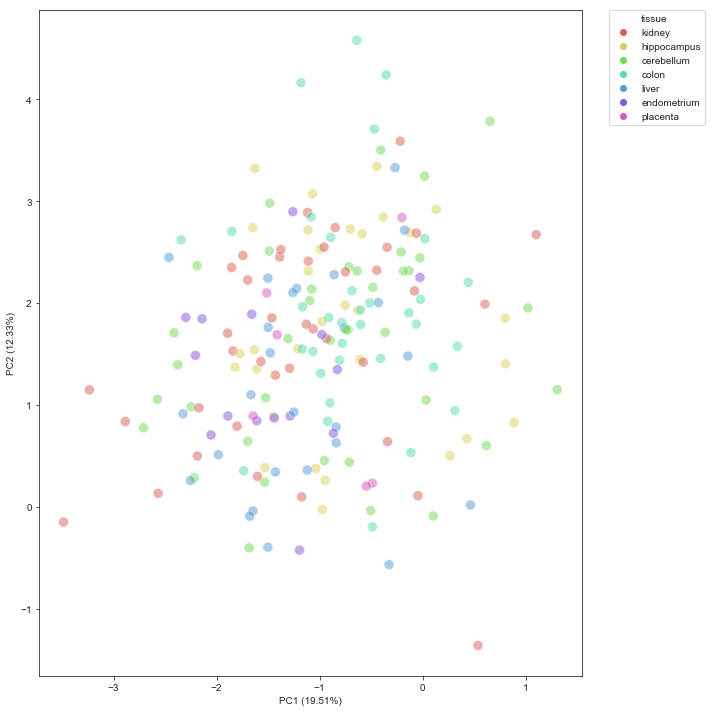

In [116]:
per_PC1 = str(round(pca_scaled.explained_variance_ratio_[0]*100, 2))
per_PC2 = str(round(pca_scaled.explained_variance_ratio_[1]*100, 2))

fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.color_palette("hls", 7)
p = sns.scatterplot(x=0, y=1,
                     hue="tissue",
                     palette=cmap, s=100,
                     data=finalDf_scaled, 
                   alpha = 0.5)

p.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p.set(xlabel="".join(["PC1 (",per_PC1,"%)"]), ylabel="".join(["PC2 (",per_PC2,"%)"]))
plt.tight_layout()


### How much variance is explained by PC1 and PC2? How well is the data separated into groups by tissue? (2 points)


**Answer**: PC1 19.51%, and PC2 12.33%. The data is not separated well into groups by tissue. 

## Q Perform tSNE analysis on the data. (7 points)

Steps: 
1. Perform PCA on the data again, this time choose 100 componenets

    `pca_scaled = decomposition.PCA(n_components=20) 
     principalComponents_tissue_scaled = pca_scaled.fit_transform(X_tissue_scaled)`
2. Embbed the data in tSNE using these parameters: 
    * number of components 2, number of iterations 2000, perplexity 50, random state 42. 
3. Convert the tSNE result into a dataframe. 
4. Visualise the results
    
    
*Hint* Use the code from the previous dataset as inspiration. 

In [117]:
#1. Step1: 

pca_scaled = decomposition.PCA(n_components=100)
principalComponents_tissue_scaled = pca_scaled.fit_transform(X_tissue_scaled)


In [118]:
#2. Step2:
x_embedded = TSNE(n_components = 2, n_iter = 2000,
                  perplexity = 50, random_state = 42).fit_transform(principalComponents_tissue_scaled)



In [119]:
#3. 
#convert tSNE result into pandas dataframe
tsne_df = pd.DataFrame(data = x_embedded)
#append the categorical variables to the dataframe
tSNE_finalDf = pd.concat([tsne_df, tissue_expression_df[["tissue"]]], axis = 1)


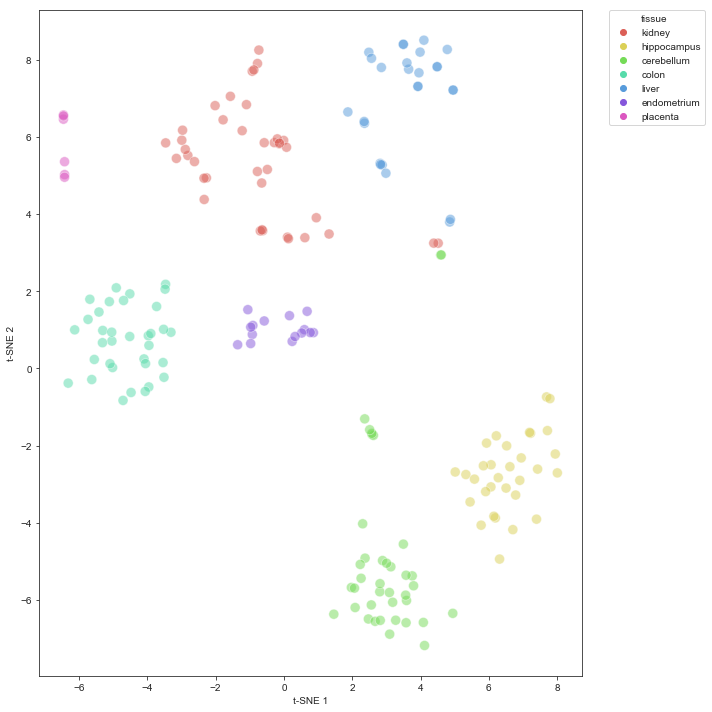

In [120]:
#4. 

#visualize the tSNE plot
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.color_palette("hls", 7)
p = sns.scatterplot(x=0, y=1,
                     hue="tissue",
                     palette=cmap, s=100,
                     data=tSNE_finalDf, 
                   alpha = 0.5)

p.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p.set(xlabel="t-SNE 1", ylabel="t-SNE 2")
plt.tight_layout()


### Q Can you see separation into groups now and how many roughly are there? Are they the groups coloured by tissue of origin? (2 points)

**Answer**: Yes, there are roughly 7 groups and they are separated by tissue.

## Q Perform UMAP analysis on the data. (7)

Steps: 
1. Embed the X_tissue data in UMAP. Use the following parameters:
    * number of neighbours 20
    * number of components 2
    * random state 42
    * metric manhattan
    * number of epochs 700
    * minimum distance 0.1
    
2. Convert the UMAP result to a dataframe and append the tissue labels. 
3. Visualise the UMAP plot

*Hint: use the UMAP analysis on the amino acid frequency dataset as inspiration*

In [121]:
# 1. Embbed X_tissue into UMAP
x_UMAP_tissue_embedded = umap.UMAP(n_neighbors = 20, n_components =2, 
                            random_state = 42, metric = 'manhattan',
                            n_epochs = 700, min_dist = 0.1).fit_transform(X_tissue) 


In [122]:
#convert UMAP result into pandas dataframe
umap_df = pd.DataFrame(data = x_UMAP_tissue_embedded)
#append the categorical variables to the dataframe
umap_finalDf = pd.concat([umap_df, tissue_expression_df[["tissue"]]], axis = 1)


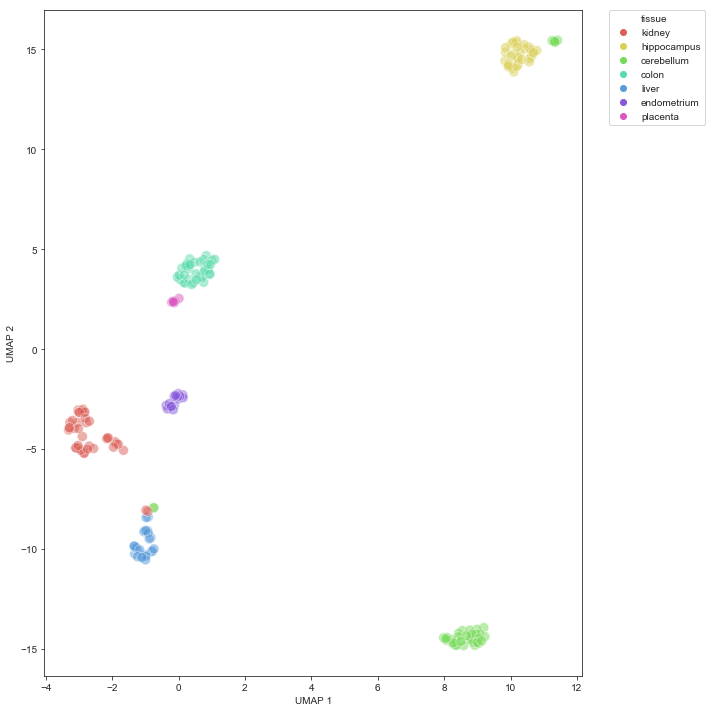

In [123]:
#visualize the UMAP plot
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.color_palette("hls", 7)
p = sns.scatterplot(x=0, y=1,
                     hue="tissue",
                     palette=cmap, s=100,
                     data=umap_finalDf, 
                   alpha = 0.5)

p.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p.set(xlabel="UMAP 1", ylabel="UMAP 2")
plt.tight_layout()



### Q Can you see separation into groups now and how many roughly are there? Are they the groups coloured by tissue of origin? (2 points)

**Answer** Roughly 8 groups. Mostly coloured by tissue origin. 

### Q Do you think the separation is better when using UMAP to tSNE? Why do you think that is? (2 points)

**Answer**: 